importing library

In [3791]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<font color = "blue" size = 50>Breast_cancer_diagnosis data</font>

In [3792]:
data1 = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Machine Learning Project Phase1\Machine Learning Project\breast_cancer_diagnosis.csv")

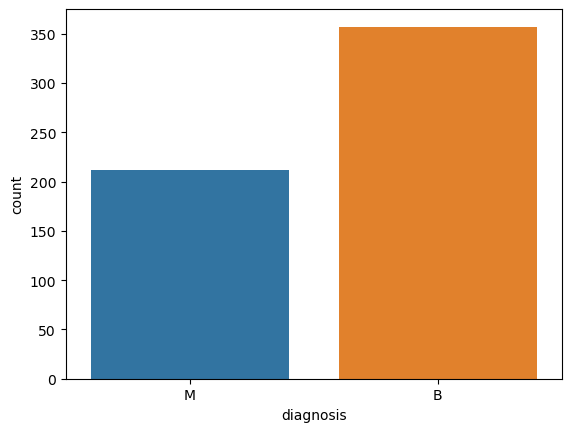

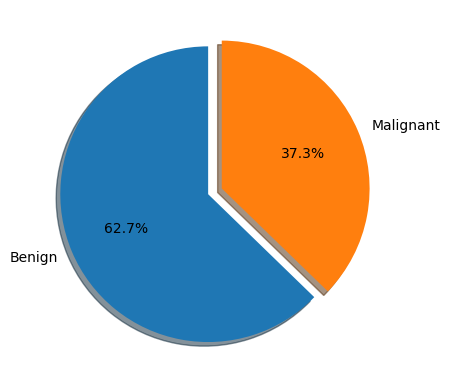

In [3793]:
ax=sns.countplot(x=data1['diagnosis'], data=data1);
plt.show()
plt.pie(data1['diagnosis'].value_counts(),labels = ['Benign', 'Malignant'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3794]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: >

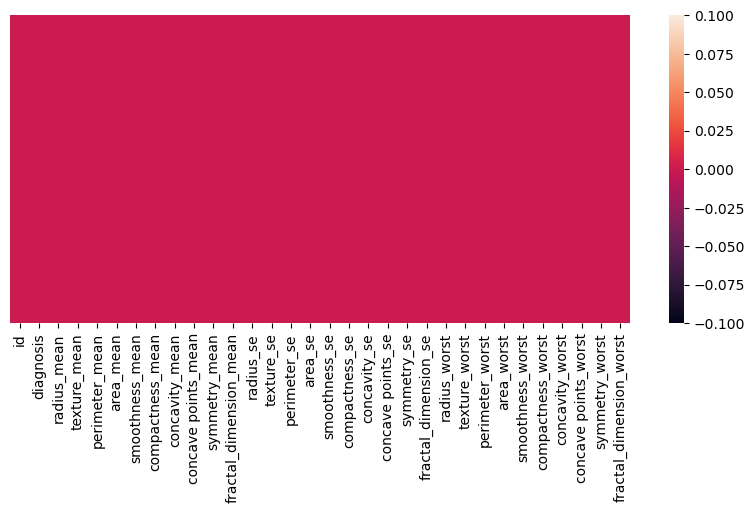

In [3795]:
data1.drop('Unnamed: 32',axis=1 , inplace=True)
plt.figure(figsize=(10,4))
sns.heatmap(data1.isnull(),yticklabels=False,cbar=True)

In [3796]:
text_features = data1.select_dtypes(include=['object']).columns.tolist()
labelEncoder = LabelEncoder()
for i in text_features:
    labelEncoder.fit(data1[i])
    data1[i] = labelEncoder.transform(data1[i])


data1.drop(columns=['id'],inplace=True) 

y1=data1[text_features]   
data1 = data1.drop(text_features, axis=1) 

normalized_data = MinMaxScaler(feature_range=(-1,1))
normalized_data.fit(data1)
df = normalized_data.transform(data1)

df = pd.DataFrame(df)

data1.iloc[:,:]=df.iloc[:,:]
data1.insert(0,"diagnosis",y1)

<Axes: >

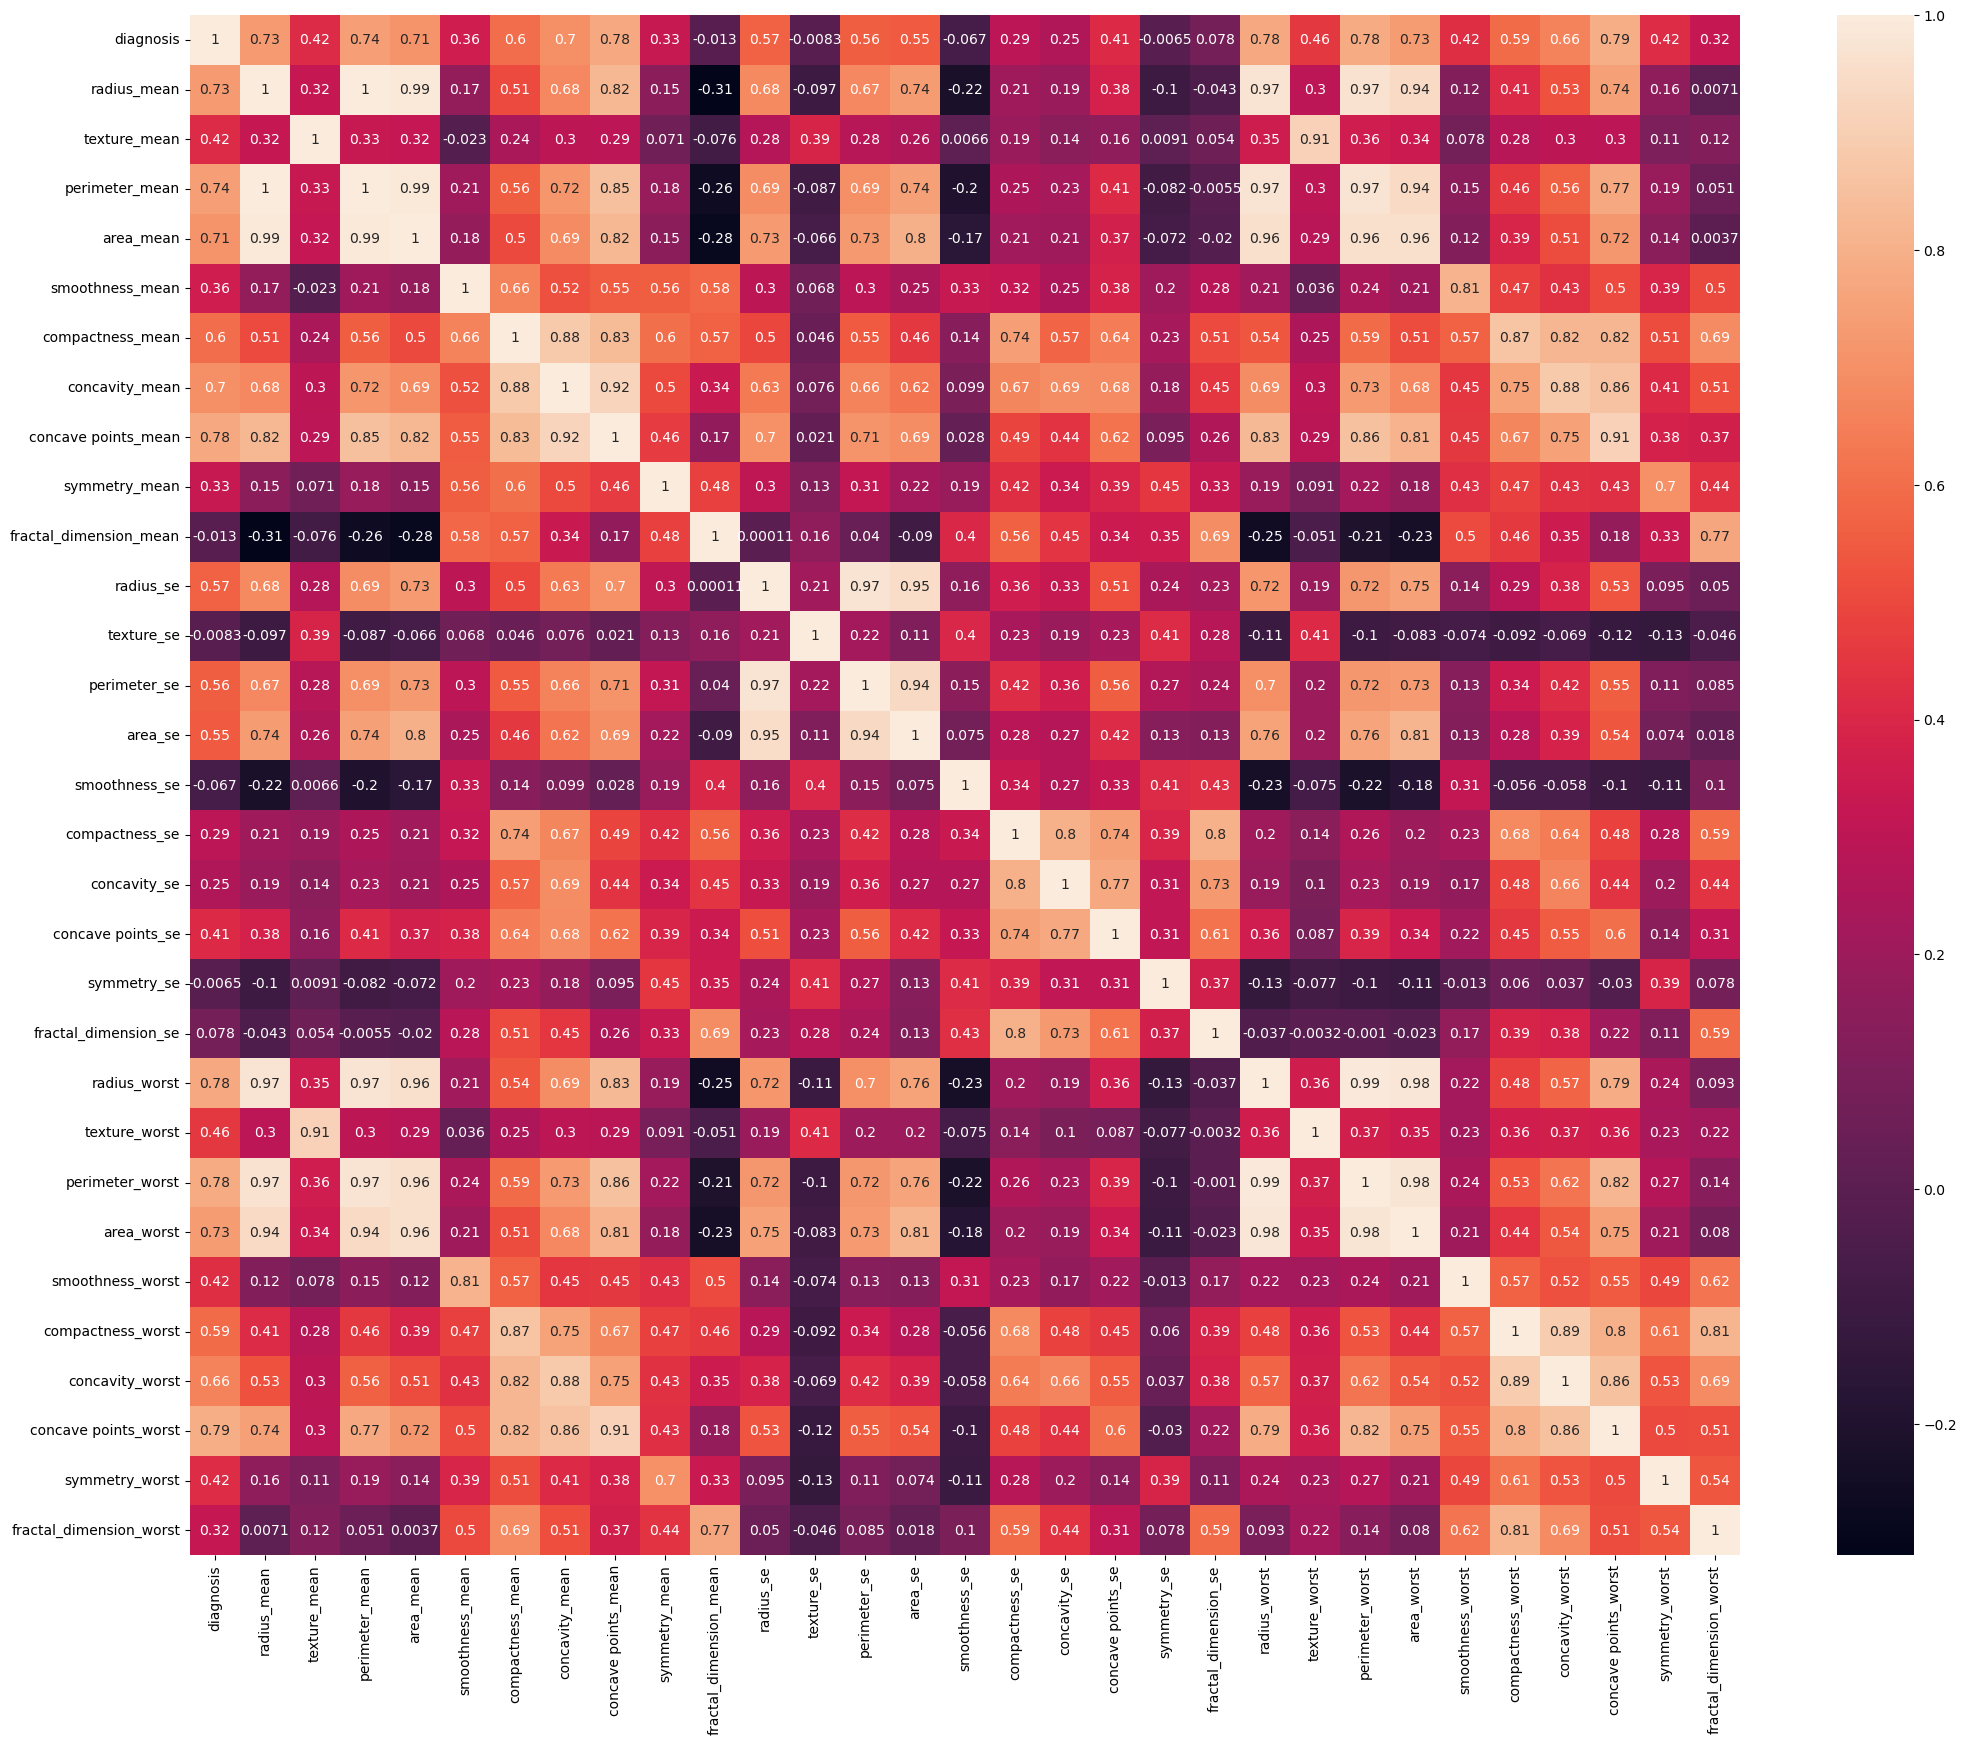

In [3797]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.corr(),annot=True)

In [3798]:
data1 = data1.drop(["fractal_dimension_mean","texture_se","fractal_dimension_se"],axis=1)

In [3799]:
# header = data1.columns.values
# header = np.delete(header, 0)
# for i in range(len(header)):
#     Q1 = data1[header[i]].quantile(0.25)
#     Q3 = data1[header[i]].quantile(0.75)
#     IQR = Q3 - Q1
#     minthresh = Q1 - (1.5 * IQR)
#     maxthresh = Q3 + (1.5 * IQR)
#     outliers = data1[(data1[header[i]] < minthresh) | (data1[header[i]] > maxthresh)]
#     data1 = data1.drop(outliers.index)


In [3800]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  smoothness_se            569 non-null    float64
 14  compactness_se           5

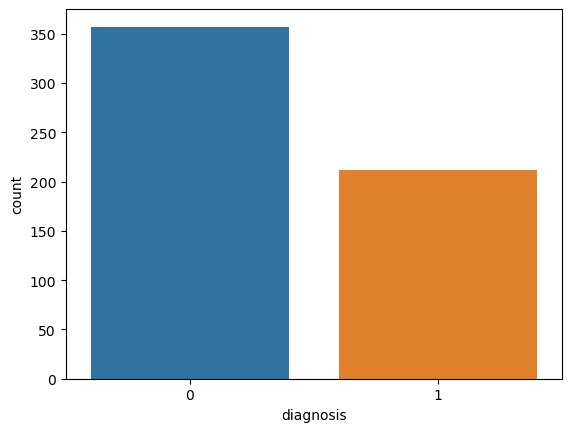

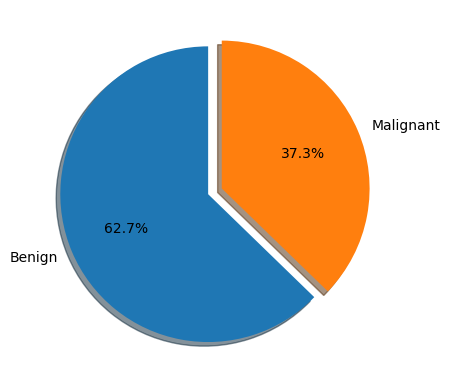

In [3801]:
ax=sns.countplot(x=data1['diagnosis'], data=data1);
plt.show()
plt.pie(data1['diagnosis'].value_counts(),labels = ['Benign', 'Malignant'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3802]:
labels1 = data1["diagnosis"]
data1 = data1.drop(["diagnosis"], axis=1) 
X_train1,X_test1,y_train1,y_test1 = train_test_split(data1,labels1,test_size=0.3)
X_train1.shape,X_test1.shape

((398, 27), (171, 27))

In [3803]:
YTrainCount = y_train1.value_counts();
print("train data:\n",YTrainCount)
YTestCount = y_test1.value_counts();
print("test data:\n",YTestCount)

train data:
 0    256
1    142
Name: diagnosis, dtype: int64
test data:
 0    101
1     70
Name: diagnosis, dtype: int64


<font color = "red" size = 30>Navie bayes</font>

The accuracy =  88.89 %


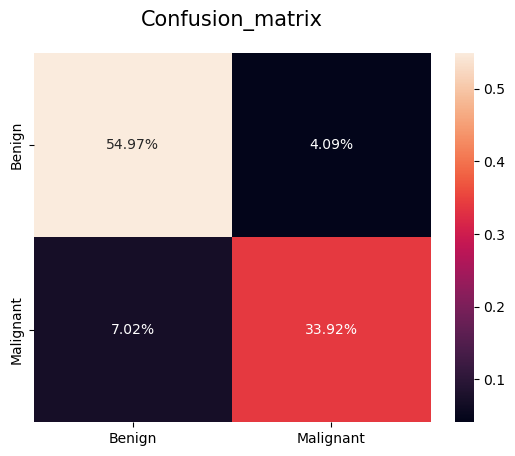

In [3804]:
NB = GaussianNB()
NB.fit(X_train1, y_train1)
y_pred1 = NB.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()


<font color = "red" size = 30>KNN</font>

The accuracy =  91.81 %


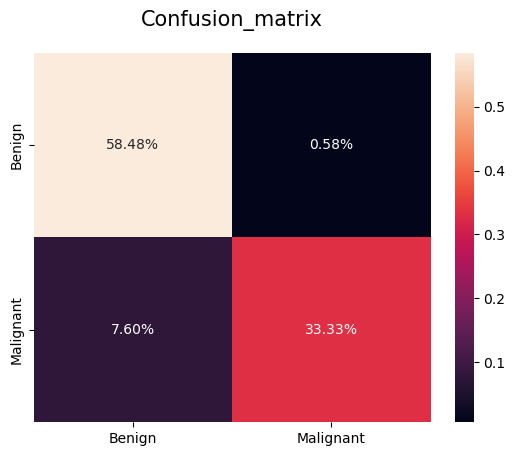

In [3805]:
knn = KNeighborsClassifier(n_neighbors=51 )
knn.fit(X_train1, y_train1)
y_pred1= knn.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font fontsize = 400px>change knn parameters by increaseing neighbors</font>

The accuracy =  90.06 %


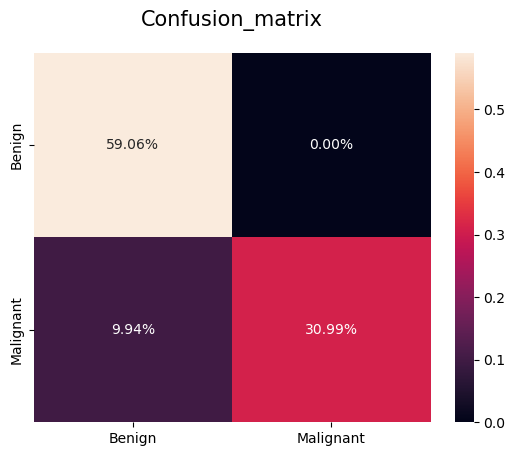

In [3806]:
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font fontsize = 400px>change knn parameters by decreasing neighbors</font>

The accuracy =  93.57 %


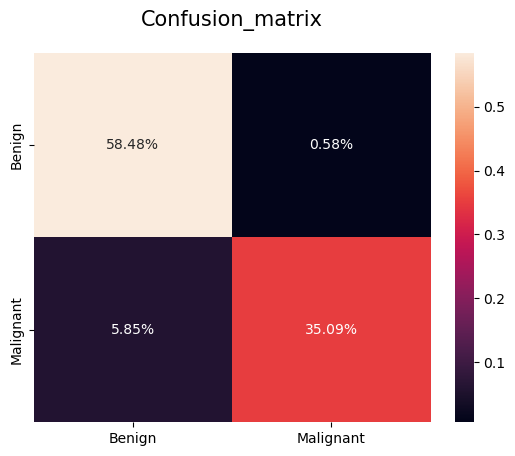

In [3807]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>MLP</font>

Iteration 1, loss = 0.62300118
Iteration 2, loss = 0.56154865
Iteration 3, loss = 0.52298354
Iteration 4, loss = 0.49815359
Iteration 5, loss = 0.47616031
Iteration 6, loss = 0.45573353
Iteration 7, loss = 0.43369273
Iteration 8, loss = 0.41103956
Iteration 9, loss = 0.38627416
Iteration 10, loss = 0.36339704
Iteration 11, loss = 0.34246775
Iteration 12, loss = 0.32154501
Iteration 13, loss = 0.30101795
Iteration 14, loss = 0.28119977
Iteration 15, loss = 0.26076142
Iteration 16, loss = 0.24211688
Iteration 17, loss = 0.22462916
Iteration 18, loss = 0.20845245
Iteration 19, loss = 0.19361278
Iteration 20, loss = 0.17969217
Iteration 21, loss = 0.16700173
Iteration 22, loss = 0.15584810
Iteration 23, loss = 0.14589379
Iteration 24, loss = 0.13701010
Iteration 25, loss = 0.12899280
Iteration 26, loss = 0.12222749
Iteration 27, loss = 0.11589717
Iteration 28, loss = 0.11042849
Iteration 29, loss = 0.10555913
Iteration 30, loss = 0.10084366
Iteration 31, loss = 0.09666373
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


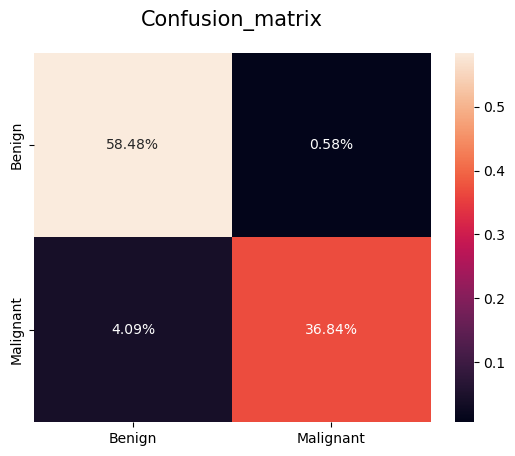

In [3808]:
MLP = MLPClassifier(verbose=True ,hidden_layer_sizes=(100,50))
MLP.fit(X_train1, y_train1)
y_pred1 = MLP.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Change number of iterations

Iteration 1, loss = 0.71271507
Iteration 2, loss = 0.65411477
Iteration 3, loss = 0.60705134
Iteration 4, loss = 0.57005507
Iteration 5, loss = 0.54540297
Iteration 6, loss = 0.52455700
Iteration 7, loss = 0.50682024
Iteration 8, loss = 0.49017739
Iteration 9, loss = 0.47269515
Iteration 10, loss = 0.45513145
Iteration 11, loss = 0.43690098
Iteration 12, loss = 0.41808446
Iteration 13, loss = 0.39814680
Iteration 14, loss = 0.37758837
Iteration 15, loss = 0.35694244
Iteration 16, loss = 0.33563075
Iteration 17, loss = 0.31664108
Iteration 18, loss = 0.29628604
Iteration 19, loss = 0.27782372
Iteration 20, loss = 0.25928206
Iteration 21, loss = 0.24245492
Iteration 22, loss = 0.22606554
Iteration 23, loss = 0.21057489
Iteration 24, loss = 0.19597386
Iteration 25, loss = 0.18289547
Iteration 26, loss = 0.17091828
Iteration 27, loss = 0.15968921
Iteration 28, loss = 0.14974386
Iteration 29, loss = 0.14064299
Iteration 30, loss = 0.13245485
Iteration 31, loss = 0.12490805
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


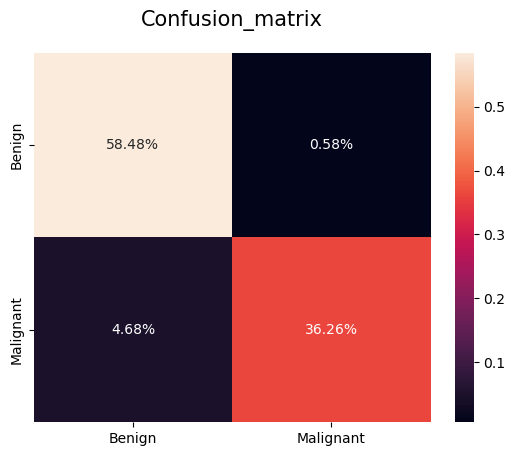

In [3809]:
MLP = MLPClassifier(random_state=10,verbose=True,max_iter=100,hidden_layer_sizes=(100,50))
MLP.fit(X_train1, y_train1)
y_pred1 = MLP.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Changing MLP  activation function and number of layers and loss function calculation parameters 

Iteration 1, loss = 0.78410689
Iteration 2, loss = 0.77251561
Iteration 3, loss = 0.76001229
Iteration 4, loss = 0.74788843
Iteration 5, loss = 0.73662489
Iteration 6, loss = 0.72572930
Iteration 7, loss = 0.71562941
Iteration 8, loss = 0.70619870
Iteration 9, loss = 0.69723943
Iteration 10, loss = 0.68863354
Iteration 11, loss = 0.68084883
Iteration 12, loss = 0.67329635
Iteration 13, loss = 0.66628350
Iteration 14, loss = 0.65961189
Iteration 15, loss = 0.65327439
Iteration 16, loss = 0.64745936
Iteration 17, loss = 0.64171984
Iteration 18, loss = 0.63652556
Iteration 19, loss = 0.63139082
Iteration 20, loss = 0.62675912
Iteration 21, loss = 0.62213210
Iteration 22, loss = 0.61786842
Iteration 23, loss = 0.61377734
Iteration 24, loss = 0.60992668
Iteration 25, loss = 0.60612739
Iteration 26, loss = 0.60262842
Iteration 27, loss = 0.59927486
Iteration 28, loss = 0.59603097
Iteration 29, loss = 0.59298396
Iteration 30, loss = 0.58998394
Iteration 31, loss = 0.58725952
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


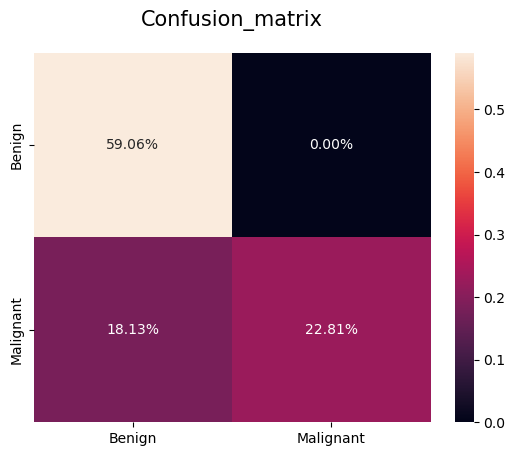

In [3810]:
MLP = MLPClassifier(activation="tanh",solver="sgd",learning_rate="adaptive" ,
                    momentum=0.5,learning_rate_init=0.001,random_state=10,
                    verbose=True,max_iter=300,hidden_layer_sizes=(100,50))
MLP.fit(X_train1, y_train1)
y_pred1 = MLP.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>SVM</font>

The accuracy =  94.74 %


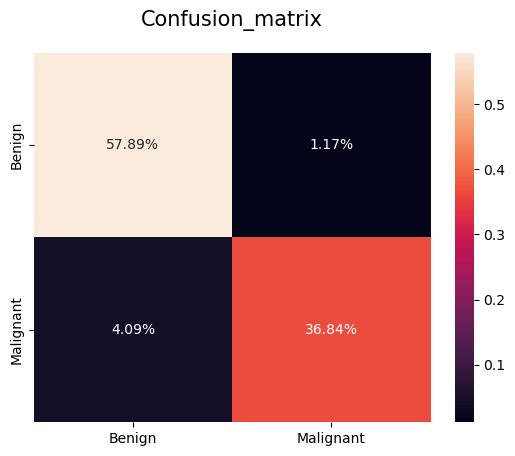

In [3811]:
SVM = SVC()  
SVM.fit(X_train1, y_train1)
y_pred1 = SVM.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Changing SVM parameters

The accuracy =  78.36 %


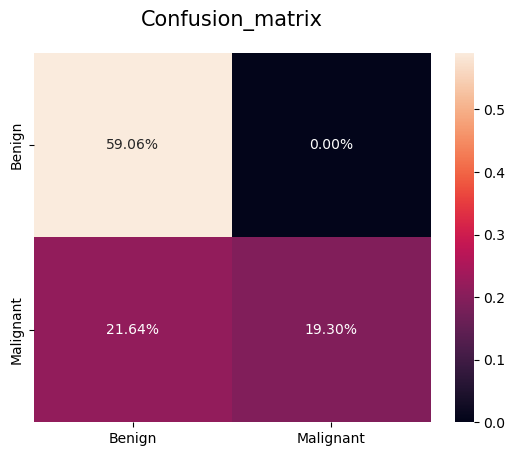

In [3812]:
SVM = SVC(C=0.1 , gamma=0.1 , kernel='sigmoid') 
SVM.fit(X_train1, y_train1)
y_pred1 = SVM.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

The accuracy =  95.91 %


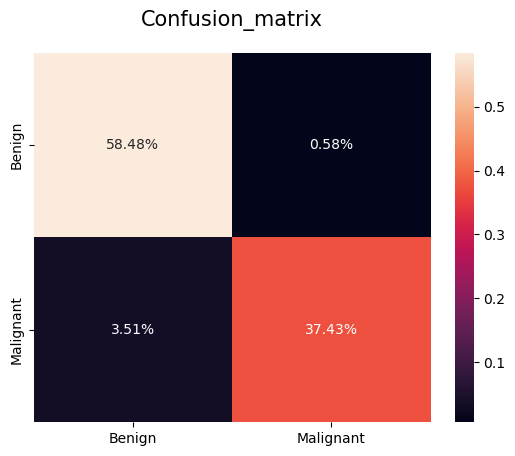

In [3813]:
SVM = SVC(C=100 , gamma=0.01 , kernel='rbf') 
SVM.fit(X_train1, y_train1)
y_pred1 = SVM.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>Decision tree</font>

The accuracy =  87.72 %


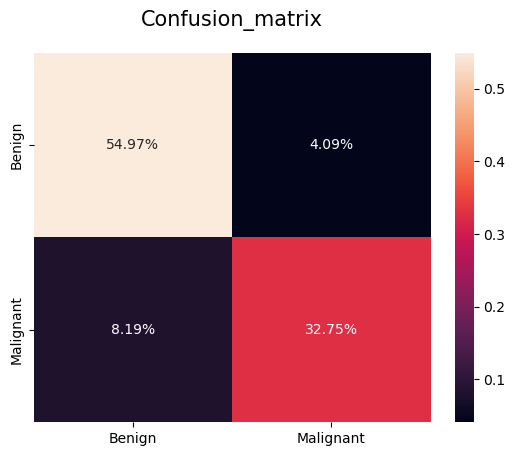

In [3814]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train1, y_train1)
y_pred1 = Tree.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

First tree visualized

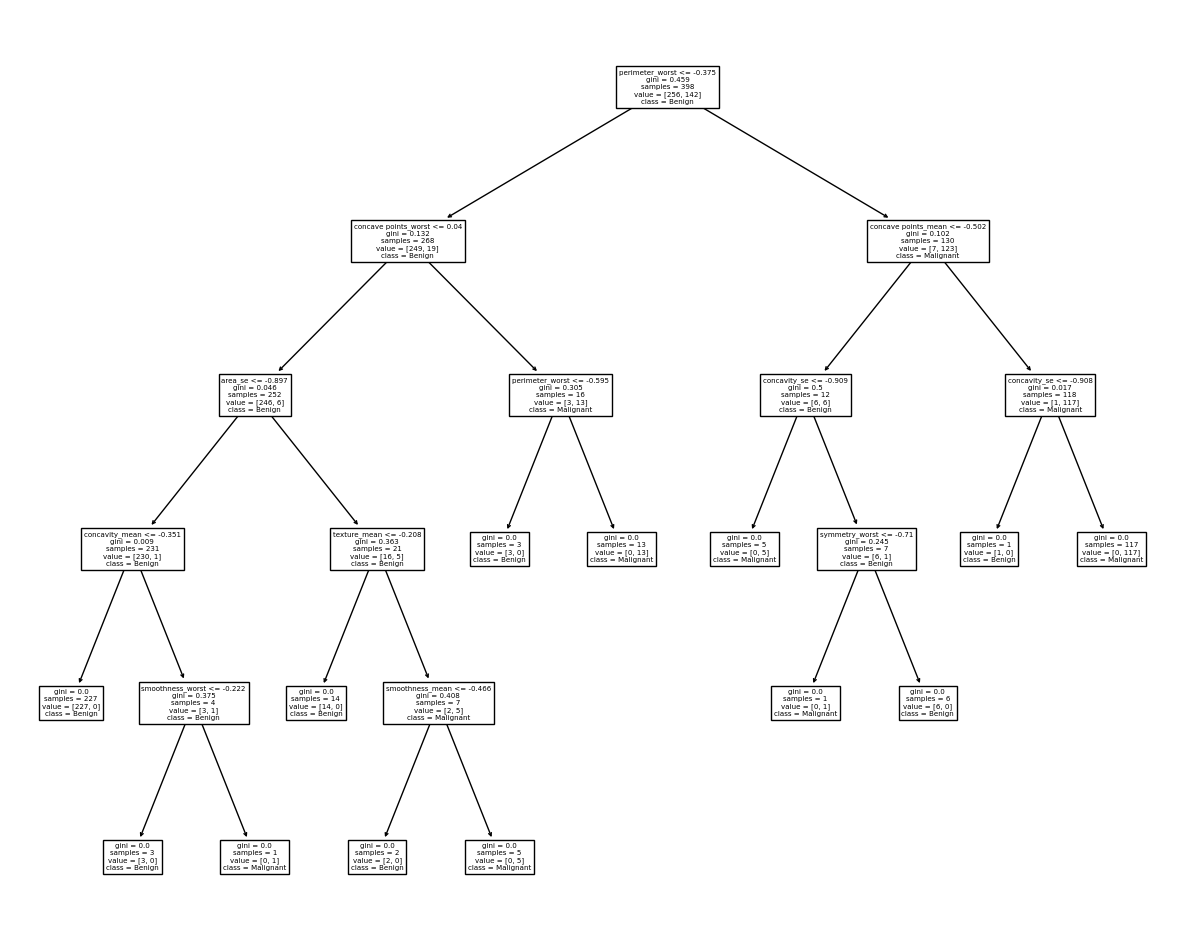

In [3815]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['Benign', 'Malignant'],feature_names=list(X_train1.columns))
plt.show()

Change parameter of decision Tree to use entropy

The accuracy =  89.47 %


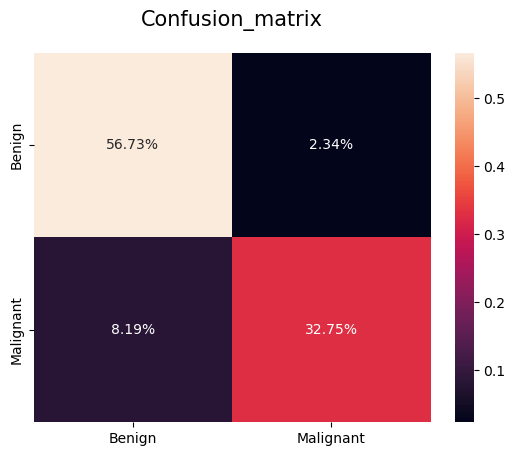

In [3816]:
Tree = DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train1, y_train1)
y_pred1 = Tree.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Second tree visualized

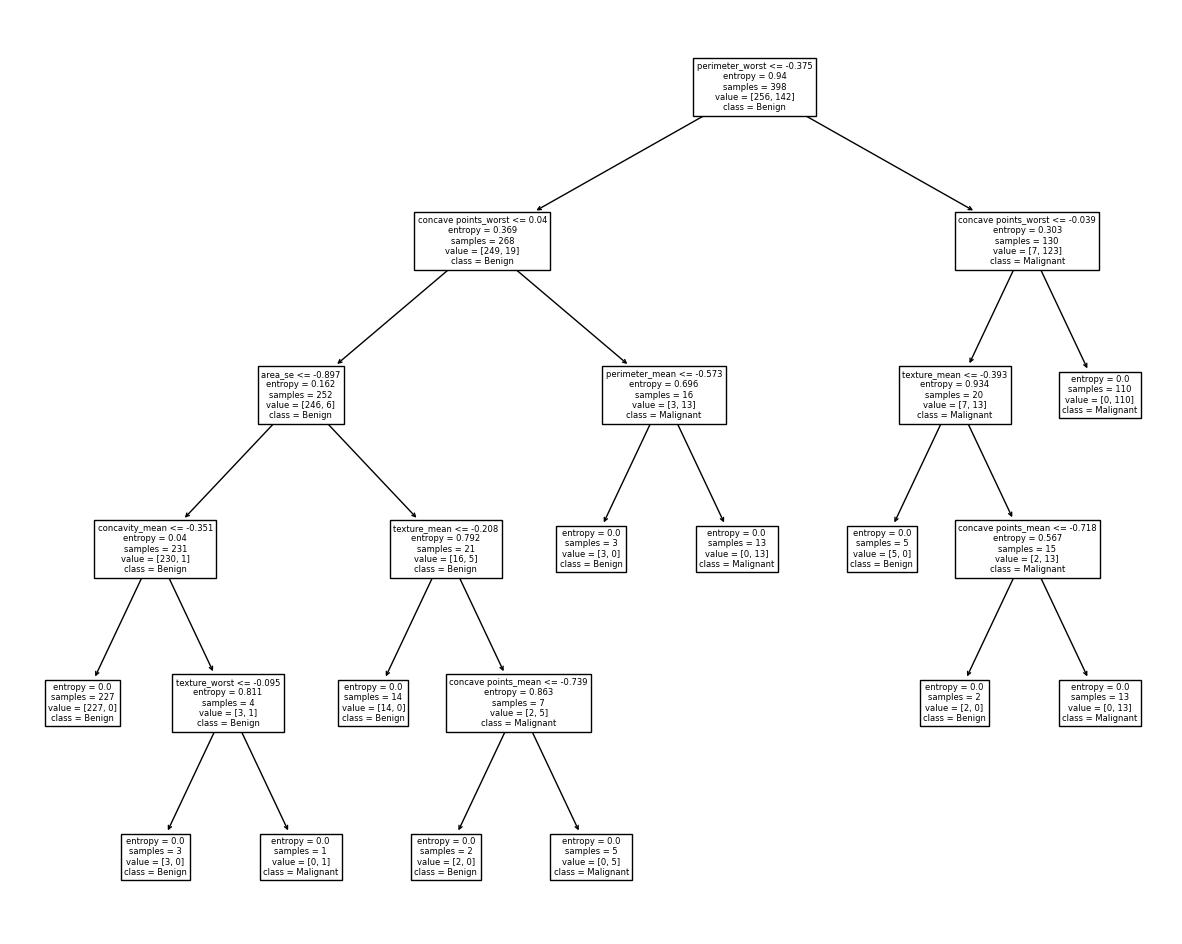

In [3817]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['Benign', 'Malignant'],feature_names=list(X_train1.columns))
plt.show()

Changing parameters of Decision Tree to use entropy and changing maximum depth

The accuracy =  89.47 %


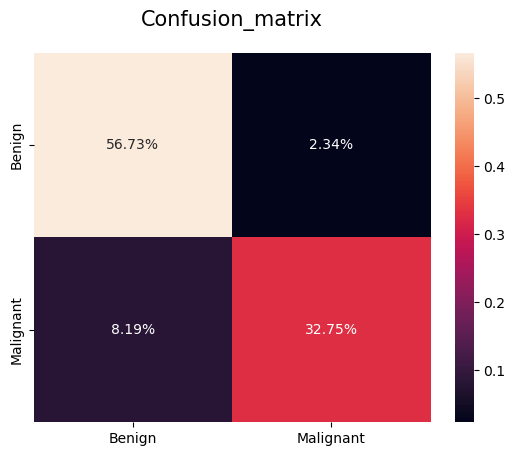

In [3818]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
Tree.fit(X_train1, y_train1)
y_pred1 = Tree.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
print("The accuracy = ",round(accuracy1*100,2) , "%")
categories = ['Benign', 'Malignant']
matrix = confusion_matrix(y_test1, y_pred1)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Third tree visualized

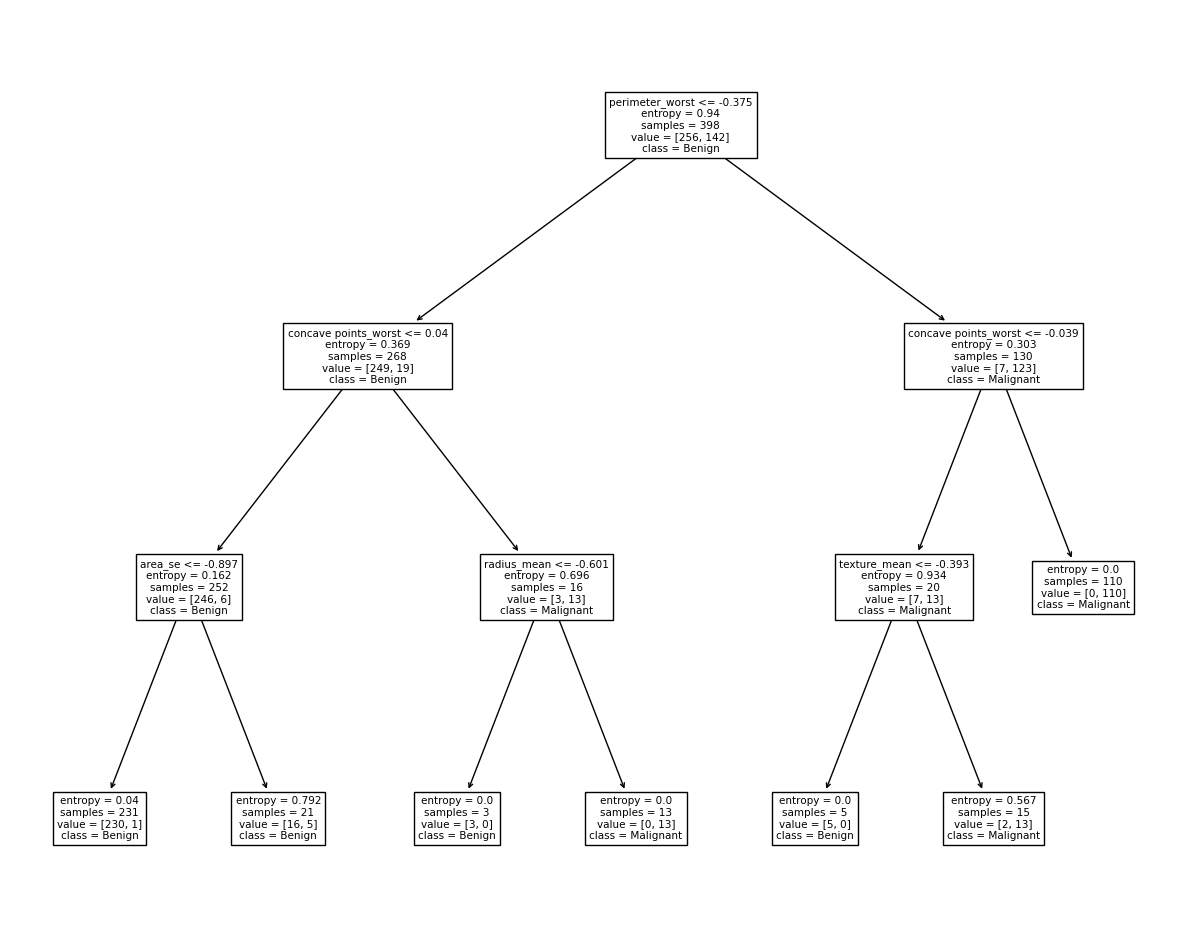

In [3819]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['Benign', 'Malignant'],feature_names=list(X_train1.columns),max_depth=3)
plt.show()

<font color = "blue" size = 50>Iphone_purchase Data</font>

In [3820]:
data2 = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Machine Learning Project Phase1\Machine Learning Project\Iphone_purchase.csv")

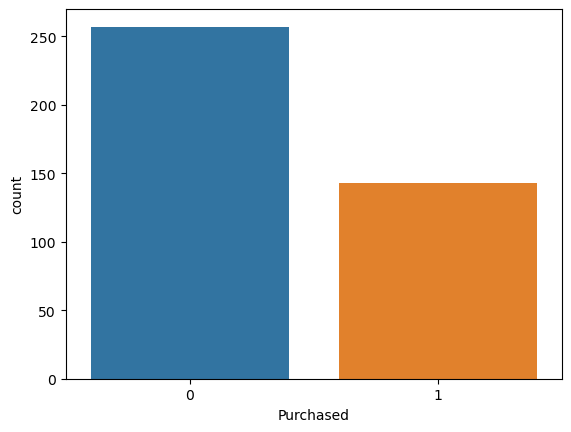

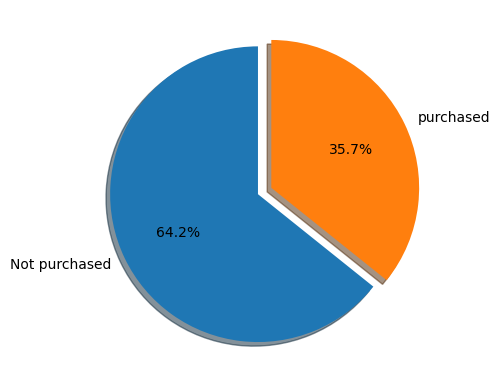

In [3821]:
ax=sns.countplot(x=data2['Purchased'], data=data2);
plt.show()
plt.pie(data2['Purchased'].value_counts(),labels = ['Not purchased', 'purchased'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3822]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<Axes: >

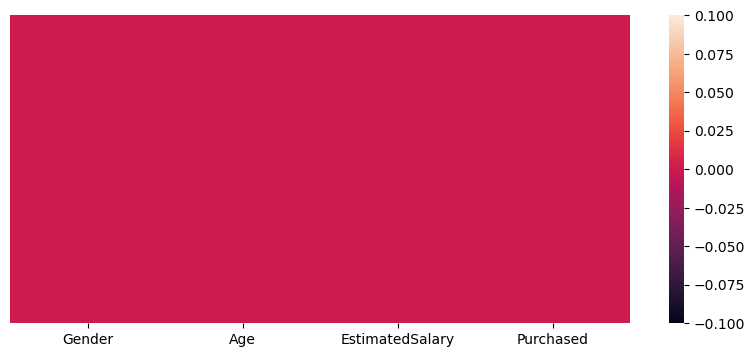

In [3823]:
data2 = data2.drop(["User ID"],axis=1)
plt.figure(figsize=(10,4))
sns.heatmap(data2.isnull(),yticklabels=False,cbar=True)

In [3824]:
data2.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [3825]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data2['Gender'])
data2['Gender'] = labelEncoder.transform(data2['Gender'])
y2 = data2['Purchased']  
data2 = data2.drop(['Purchased'], axis=1) 

normalized_data = MinMaxScaler(feature_range=(-1,1))
normalized_data.fit(data2)
df2 = normalized_data.transform(data2)
df2 = pd.DataFrame(df2)

data2.iloc[:,:]=df2.iloc[:,:]
data2.insert(0,"Purchased",y2)



C:\Users\Asus\AppData\Local\Temp\ipykernel_14904\3043704313.py:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data2.iloc[:,:]=df2.iloc[:,:]


<Axes: >

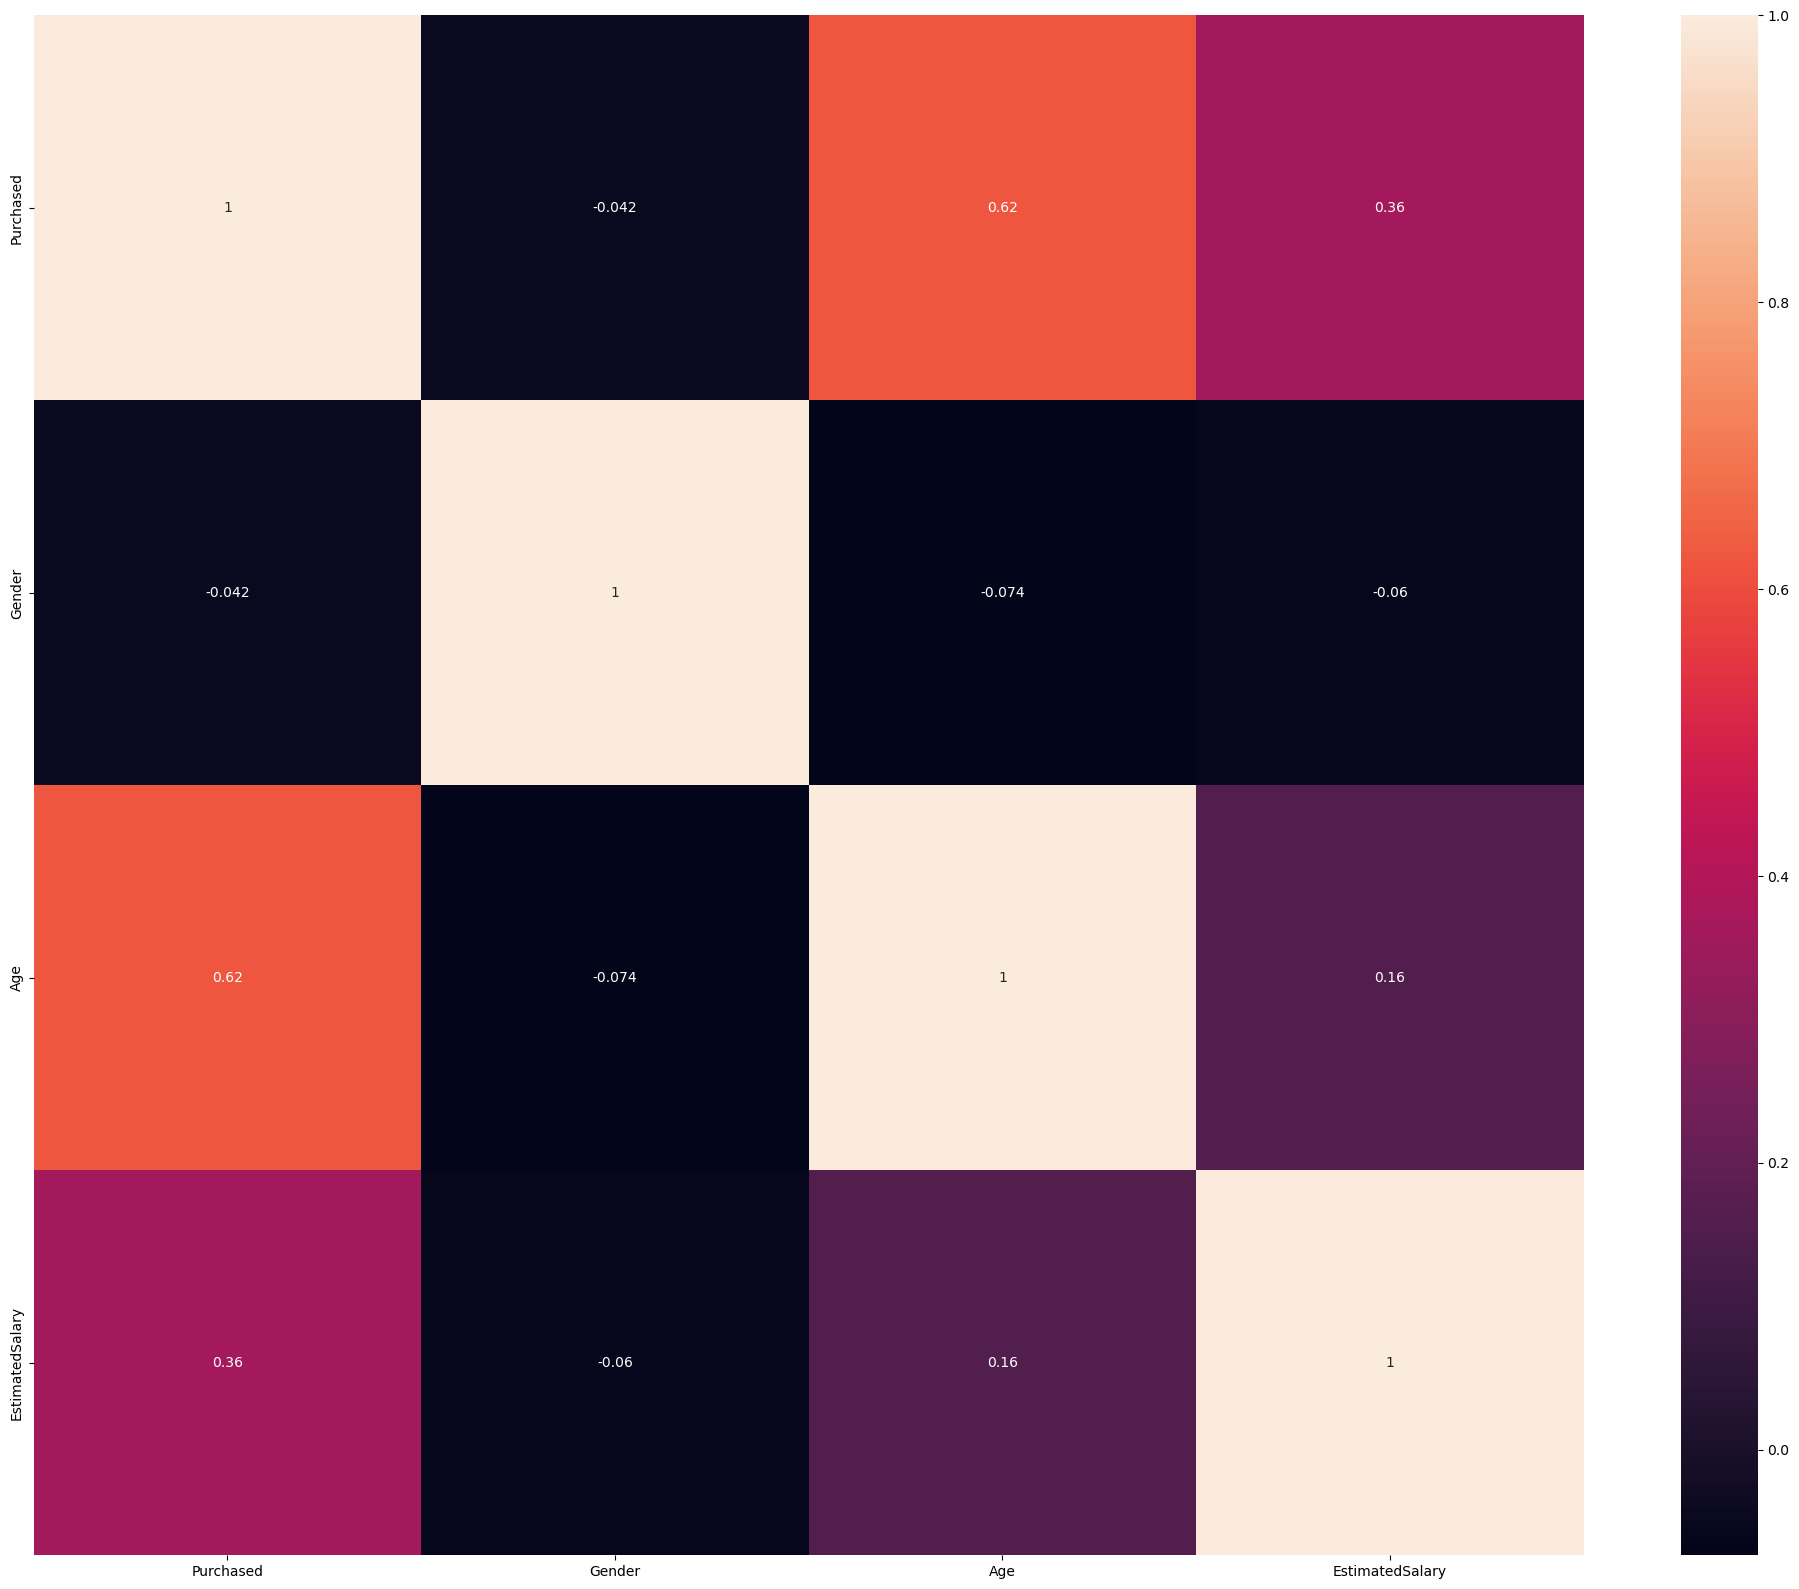

In [3826]:
plt.figure(figsize=(25,20))
sns.heatmap(data2.corr(),annot=True)

In [3827]:
header = data2.columns.values
header = np.delete(header, 0)
for i in range(len(header)):
    Q1 = data2[header[i]].quantile(0.25)
    Q3 = data2[header[i]].quantile(0.75)
    IQR = Q3 - Q1
    minthresh = Q1 - (1.5 * IQR)
    maxthresh = Q3 + (1.5 * IQR)
    outliers = data2[(data2[header[i]] < minthresh) | (data2[header[i]] > maxthresh)]
    data2 = data2.drop(outliers.index)

In [3828]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Purchased        400 non-null    int64  
 1   Gender           400 non-null    float64
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


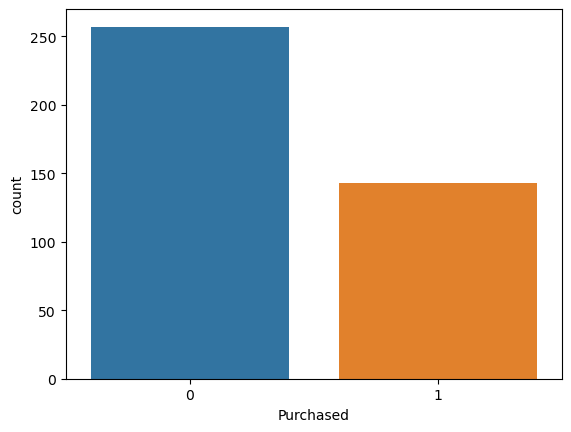

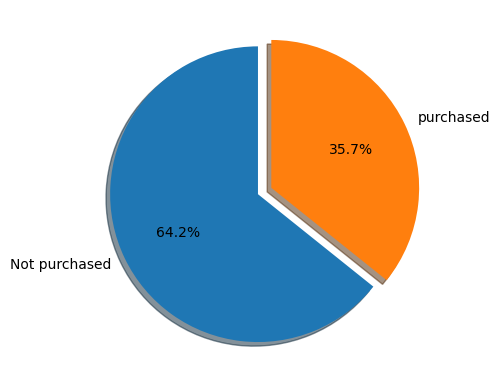

In [3829]:
ax=sns.countplot(x=data2['Purchased'], data=data2);
plt.show()
plt.pie(data2['Purchased'].value_counts(),labels = ['Not purchased', 'purchased'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3830]:
labels2 = data2["Purchased"]
data2 = data2.drop(["Purchased"], axis=1) 
X_train2,X_test2,y_train2,y_test2 = train_test_split(data2,labels2,test_size=0.3)
X_train2.shape,X_test2.shape


((280, 3), (120, 3))

In [3831]:
YTrainCount = y_train2.value_counts();
print("train data:\n",YTrainCount)
YTestCount = y_test2.value_counts();
print("test data:\n",YTestCount)

train data:
 0    181
1     99
Name: Purchased, dtype: int64
test data:
 0    76
1    44
Name: Purchased, dtype: int64


<font color = "red" size =30>Naive bayes</font>

The accuracy =  85.83 %


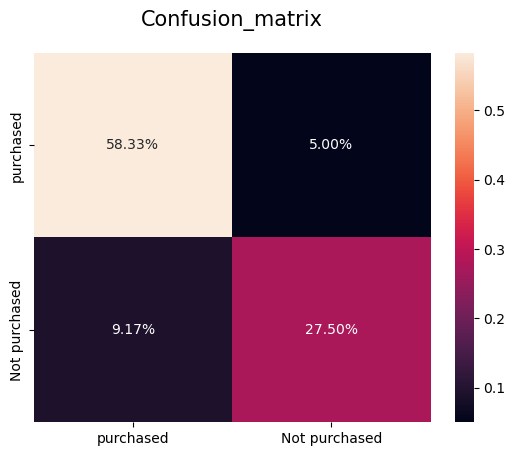

In [3832]:
NB = GaussianNB()
NB.fit(X_train2, y_train2)
y_pred2 = NB.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color="red" size = 30>KNN</font>

The accuracy =  74.17 %


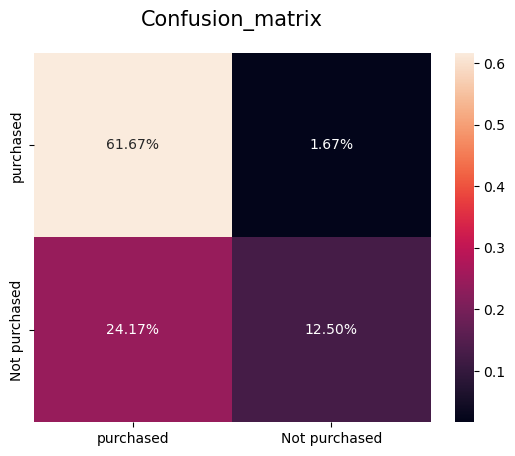

In [3833]:
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(X_train2, y_train2)
y_pred2= knn.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font fontsize = 400px>change knn parameters by increaseing neighbors</font>

The accuracy =  64.17 %


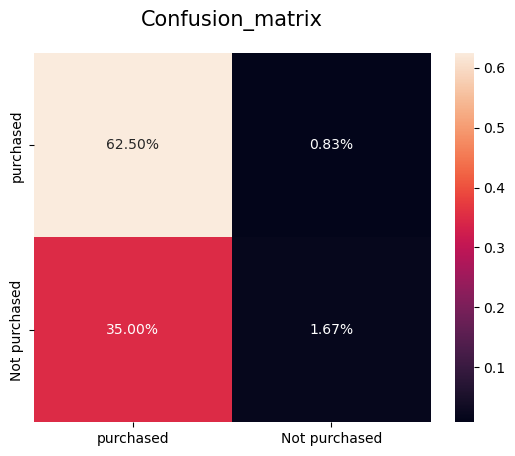

In [3834]:
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font fontsize = 400px>change knn parameters by decreasing neighbors</font>

The accuracy =  87.5 %


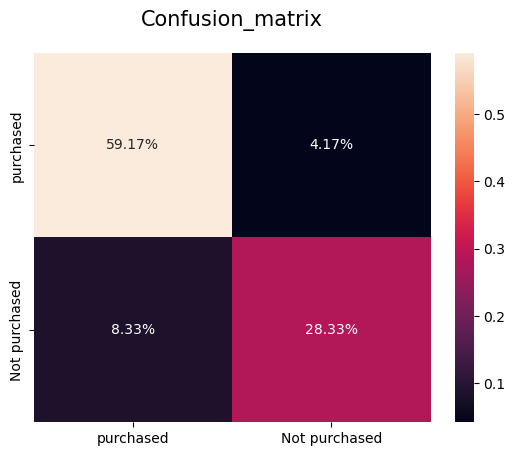

In [3835]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train2, y_train2)
y_pred2 = knn.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>MLP</font>

Iteration 1, loss = 0.74790424
Iteration 2, loss = 0.72208389
Iteration 3, loss = 0.69824399
Iteration 4, loss = 0.67625769
Iteration 5, loss = 0.65720754
Iteration 6, loss = 0.63986559
Iteration 7, loss = 0.62396840
Iteration 8, loss = 0.60894895
Iteration 9, loss = 0.59548327
Iteration 10, loss = 0.58242150
Iteration 11, loss = 0.57048547
Iteration 12, loss = 0.55890121
Iteration 13, loss = 0.54714254
Iteration 14, loss = 0.53596708
Iteration 15, loss = 0.52535119
Iteration 16, loss = 0.51479934
Iteration 17, loss = 0.50375546
Iteration 18, loss = 0.49354312
Iteration 19, loss = 0.48292484
Iteration 20, loss = 0.47299506
Iteration 21, loss = 0.46236252
Iteration 22, loss = 0.45224433
Iteration 23, loss = 0.44230715
Iteration 24, loss = 0.43264394
Iteration 25, loss = 0.42324650
Iteration 26, loss = 0.41400191
Iteration 27, loss = 0.40540814
Iteration 28, loss = 0.39643579
Iteration 29, loss = 0.38795099
Iteration 30, loss = 0.38031057
Iteration 31, loss = 0.37277342
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


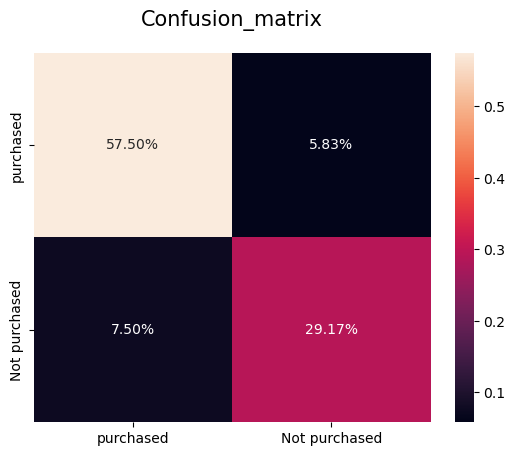

In [3836]:
MLP = MLPClassifier(verbose=True ,hidden_layer_sizes=(100,50))
MLP.fit(X_train2, y_train2)
y_pred2 = MLP.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Change number of iterations

Iteration 1, loss = 0.70519251
Iteration 2, loss = 0.68273061
Iteration 3, loss = 0.66202479
Iteration 4, loss = 0.64198008
Iteration 5, loss = 0.62409508
Iteration 6, loss = 0.60717313
Iteration 7, loss = 0.59163865
Iteration 8, loss = 0.57732710
Iteration 9, loss = 0.56332798
Iteration 10, loss = 0.54994088
Iteration 11, loss = 0.53719352
Iteration 12, loss = 0.52545898
Iteration 13, loss = 0.51351233
Iteration 14, loss = 0.50169884
Iteration 15, loss = 0.49001190
Iteration 16, loss = 0.47847310
Iteration 17, loss = 0.46713298
Iteration 18, loss = 0.45555029
Iteration 19, loss = 0.44449650
Iteration 20, loss = 0.43391538
Iteration 21, loss = 0.42399566
Iteration 22, loss = 0.41493837
Iteration 23, loss = 0.40562998
Iteration 24, loss = 0.39741607
Iteration 25, loss = 0.38913506
Iteration 26, loss = 0.38140458
Iteration 27, loss = 0.37417413
Iteration 28, loss = 0.36717125
Iteration 29, loss = 0.36088035
Iteration 30, loss = 0.35487082
Iteration 31, loss = 0.34905284
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


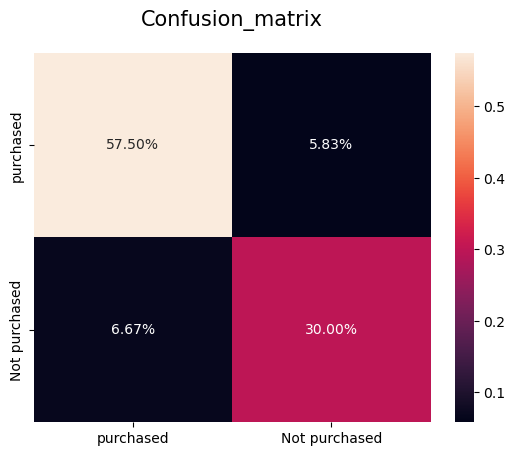

In [3837]:
MLP = MLPClassifier(random_state=10,verbose=True,max_iter=100,hidden_layer_sizes=(100,50))
MLP.fit(X_train2, y_train2)
y_pred2 = MLP.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Changing MLP  activation function and number of layers and loss function calculation parameters

Iteration 1, loss = 0.74445155
Iteration 2, loss = 0.74174436
Iteration 3, loss = 0.73876893
Iteration 4, loss = 0.73577215
Iteration 5, loss = 0.73285596
Iteration 6, loss = 0.72997521
Iteration 7, loss = 0.72712309
Iteration 8, loss = 0.72430042
Iteration 9, loss = 0.72147960
Iteration 10, loss = 0.71862932
Iteration 11, loss = 0.71580971
Iteration 12, loss = 0.71311209
Iteration 13, loss = 0.71049025
Iteration 14, loss = 0.70791010
Iteration 15, loss = 0.70533649
Iteration 16, loss = 0.70282094
Iteration 17, loss = 0.70033680
Iteration 18, loss = 0.69786520
Iteration 19, loss = 0.69537002
Iteration 20, loss = 0.69296705
Iteration 21, loss = 0.69062471
Iteration 22, loss = 0.68831330
Iteration 23, loss = 0.68599620
Iteration 24, loss = 0.68372594
Iteration 25, loss = 0.68147758
Iteration 26, loss = 0.67928883
Iteration 27, loss = 0.67714722
Iteration 28, loss = 0.67506570
Iteration 29, loss = 0.67304265
Iteration 30, loss = 0.67101446
Iteration 31, loss = 0.66897325
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


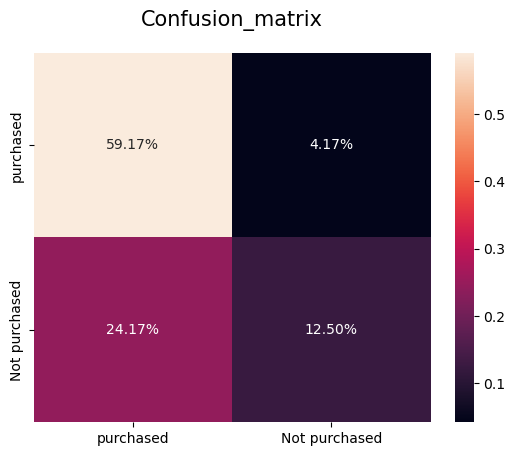

In [3838]:
MLP = MLPClassifier(activation="tanh",solver="sgd",learning_rate="adaptive" ,
                    momentum=0.5,learning_rate_init=0.001,random_state=10,
                    verbose=True,max_iter=300,hidden_layer_sizes=(100,50))
MLP.fit(X_train2, y_train2)
y_pred2 = MLP.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>SVM</font>

The accuracy =  86.67 %


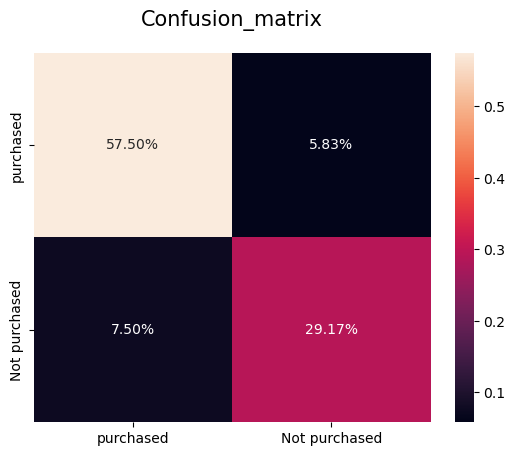

In [3839]:
SVM = SVC() 
SVM.fit(X_train2, y_train2)
y_pred2 = SVM.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()  

  Changing SVM parameters

The accuracy =  63.33 %


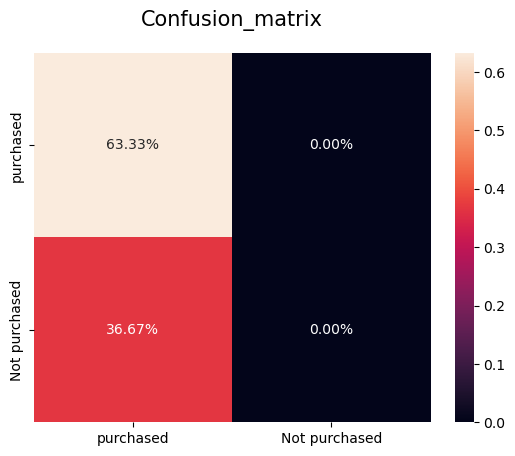

In [3840]:
SVM = SVC(C=0.1 , gamma=0.1 , kernel='sigmoid') 
SVM.fit(X_train2, y_train2)
y_pred2 = SVM.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()  

The accuracy =  82.5 %


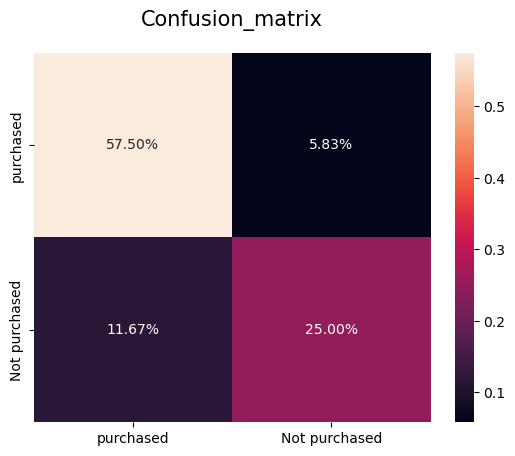

In [3841]:
SVM = SVC(C=100 , gamma=0.01 , kernel='rbf')
SVM.fit(X_train2, y_train2)
y_pred2 = SVM.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()  

<font color = "red" size = 30>Decision tree</font>

The accuracy =  84.17 %


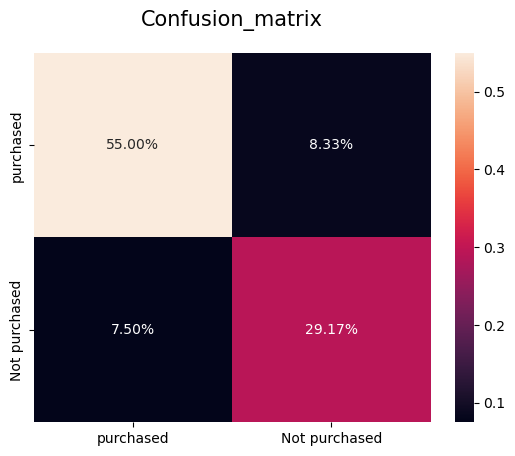

In [3842]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train2, y_train2)
y_pred2 = Tree.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

First tree visualized

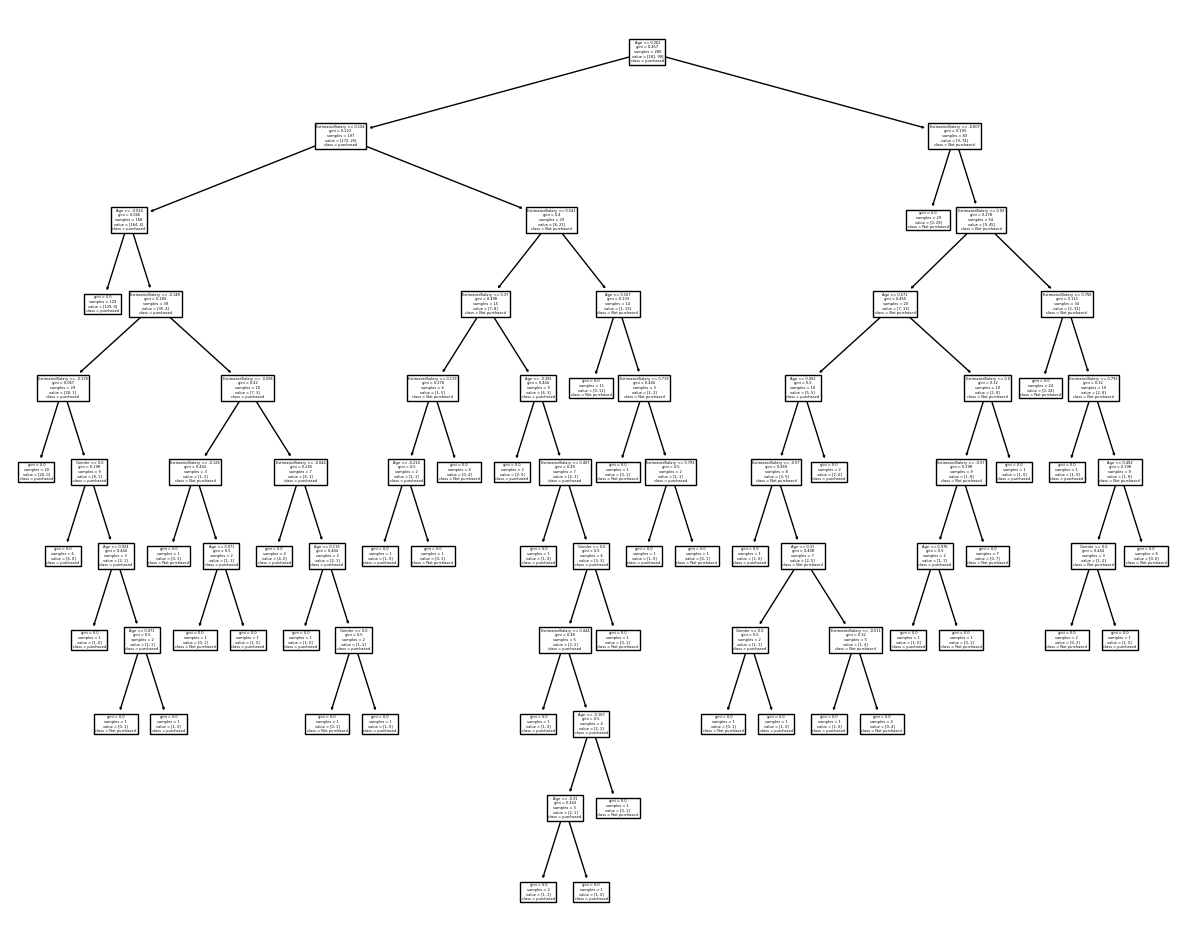

In [3843]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['purchased', 'Not purchased'],feature_names=list(X_train2.columns))
plt.show()

Change parameter of decision Tree to use entropy

The accuracy =  84.17 %


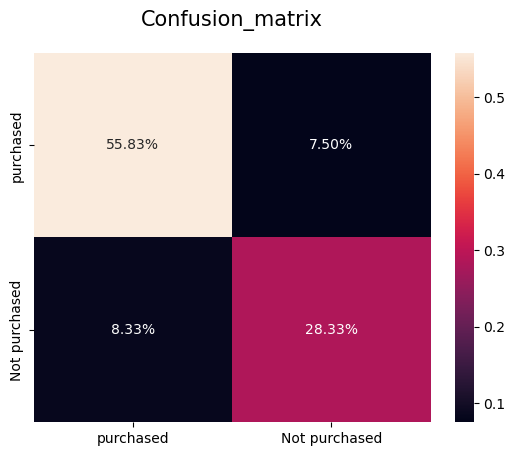

In [3844]:
Tree = DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train2, y_train2)
y_pred2 = Tree.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Second tree visualized

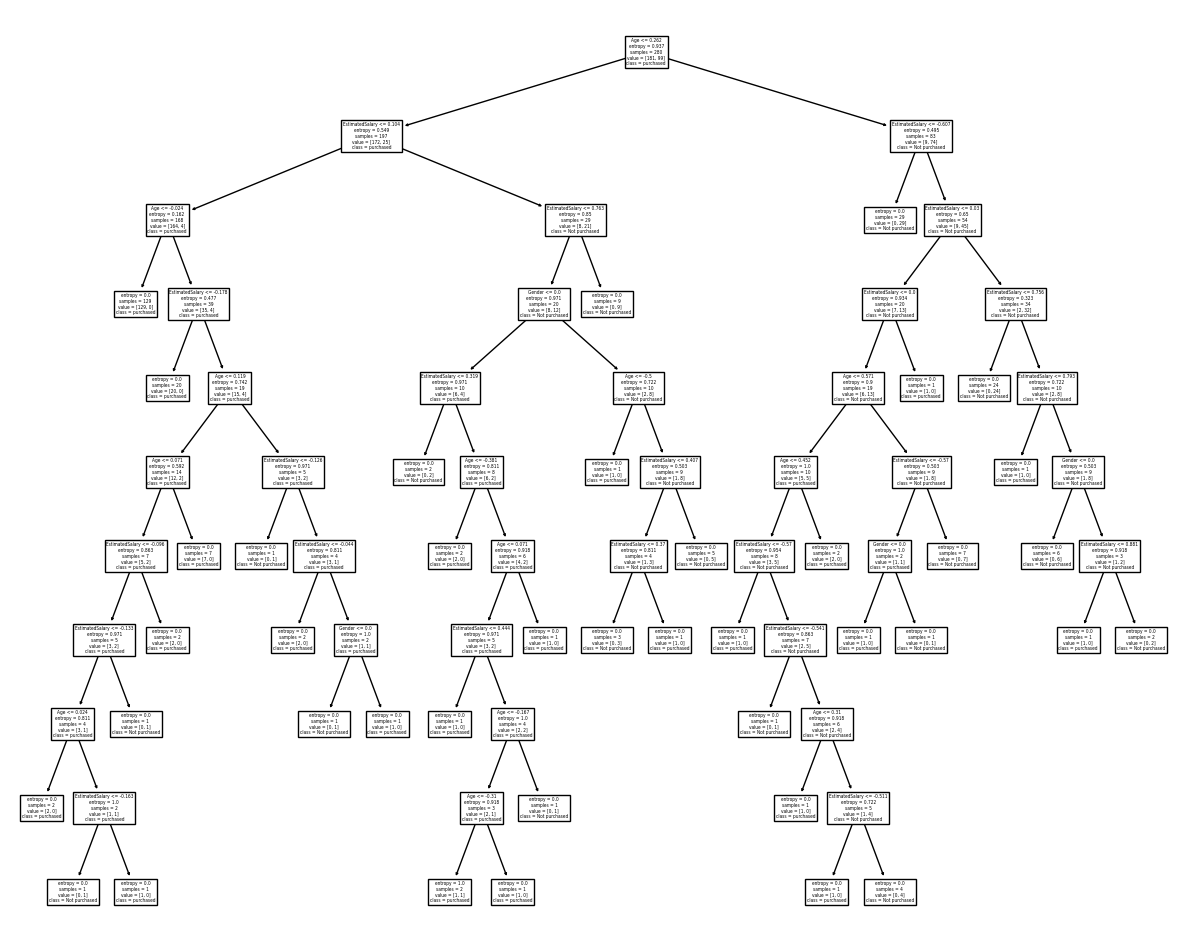

In [3845]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['purchased', 'Not purchased'],feature_names=list(X_train2.columns))
plt.show()

Changing parameters of Decision Tree to use entropy and changing maximum depth

The accuracy =  89.17 %


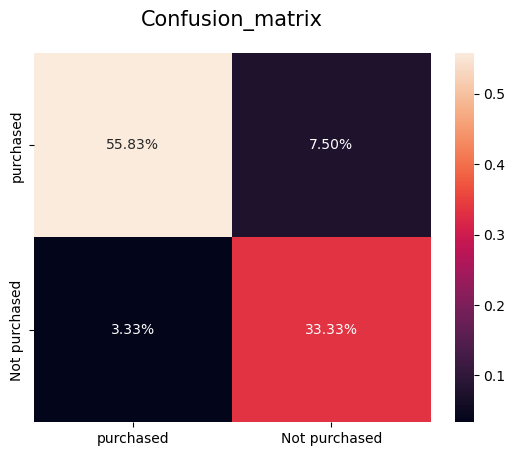

In [3846]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
Tree.fit(X_train2, y_train2)
y_pred2 = Tree.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print("The accuracy = ",round(accuracy2*100,2) , "%")
categories = ['purchased', 'Not purchased']
matrix = confusion_matrix(y_test2, y_pred2)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Third tree visualized

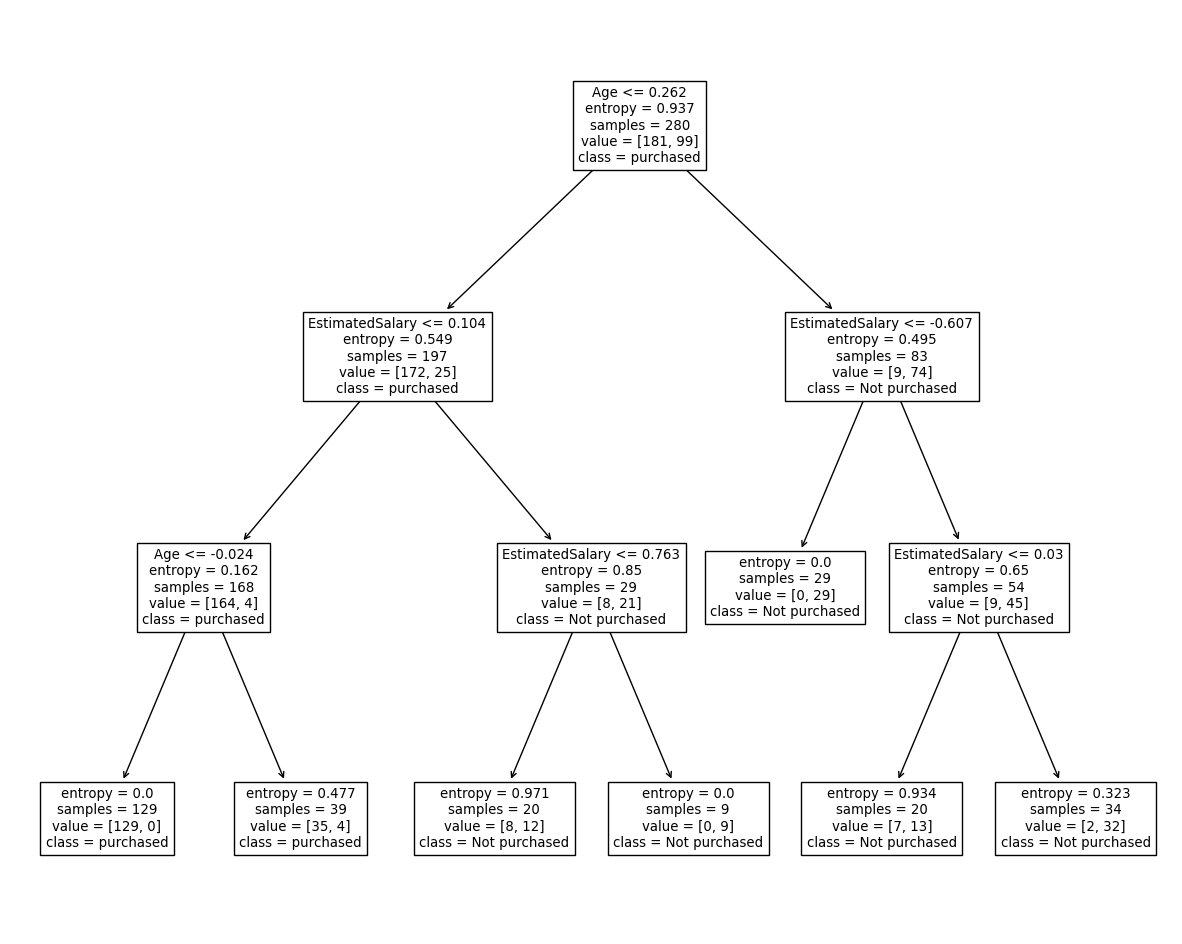

In [3847]:
fig = plt.figure(figsize=(15, 12))
tree.plot_tree(Tree,class_names=['purchased', 'Not purchased'],feature_names=list(X_train2.columns))
plt.show()

<font color = "blue" size = 50>loan_train Data</font>

In [3848]:
data3 = pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\Machine Learning Project Phase1\Machine Learning Project\loan_train.csv")

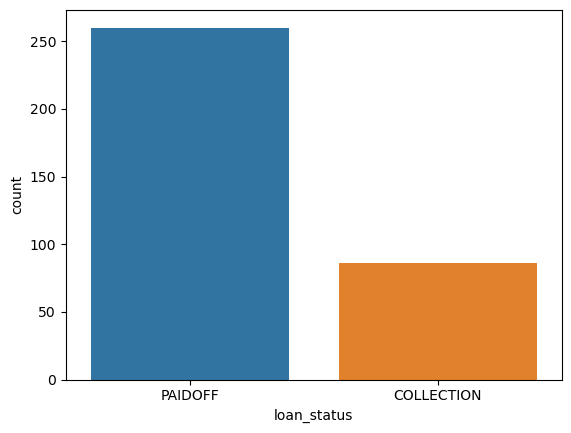

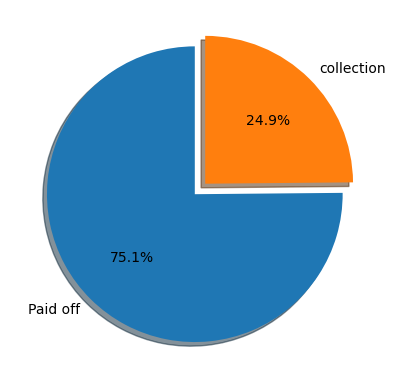

In [3849]:
ax=sns.countplot(x=data3['loan_status'], data=data3);
plt.show()
plt.pie(data3['loan_status'].value_counts(),labels = ['Paid off', 'collection'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3850]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


<Axes: >

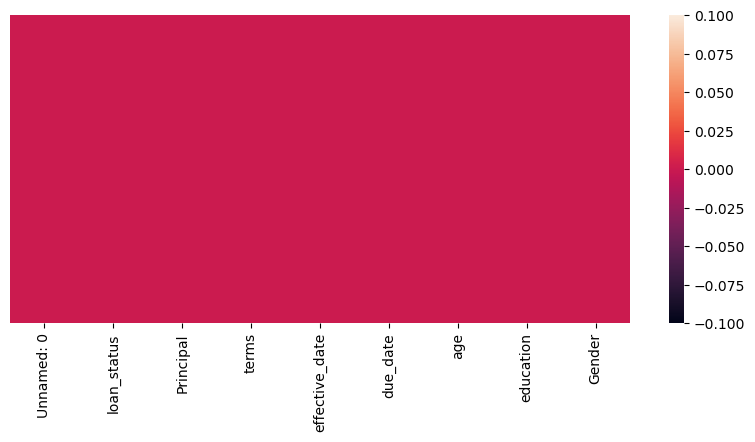

In [3851]:
data3 = data3.drop(["Unnamed: 0.1"],axis=1)
plt.figure(figsize=(10,4))
sns.heatmap(data3.isnull(),yticklabels=False,cbar=True)

In [3852]:
data3.describe()

,Unnamed: 0,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000
mean,202.167630,943.641618,22.653179,30.939306
std,115.459715,109.425530,7.991006,6.039418
min,0.000000,300.000000,7.000000,18.000000
25%,107.250000,900.000000,15.000000,27.000000
50%,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,1000.000000,30.000000,35.000000
max,399.000000,1000.000000,30.000000,51.000000


In [3853]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data3['due_date'])
data3['due_date'] = labelEncoder.transform(data3['due_date'])
labelEncoder.fit(data3['Gender'])
data3['Gender'] = labelEncoder.transform(data3['Gender'])
labelEncoder.fit(data3['education'])
data3['education'] = labelEncoder.transform(data3['education'])
labelEncoder.fit(data3['effective_date'])
data3['effective_date'] = labelEncoder.transform(data3['effective_date'])
labelEncoder.fit(data3['loan_status'])
data3['loan_status'] = labelEncoder.transform(data3['loan_status'])


data3 = data3.drop(["Unnamed: 0"],axis=1)
y3 = data3['loan_status']  
data3 = data3.drop(['loan_status'], axis=1) 

normalized_data = MinMaxScaler(feature_range=(-1,1))
normalized_data.fit(data3)
df3 = normalized_data.transform(data3)
df3 = pd.DataFrame(df3)

data3.iloc[:,:]=df3.iloc[:,:]
data3.insert(0,"loan_status",y3)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14904\3785033389.py:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data3.iloc[:,:]=df3.iloc[:,:]


<Axes: >

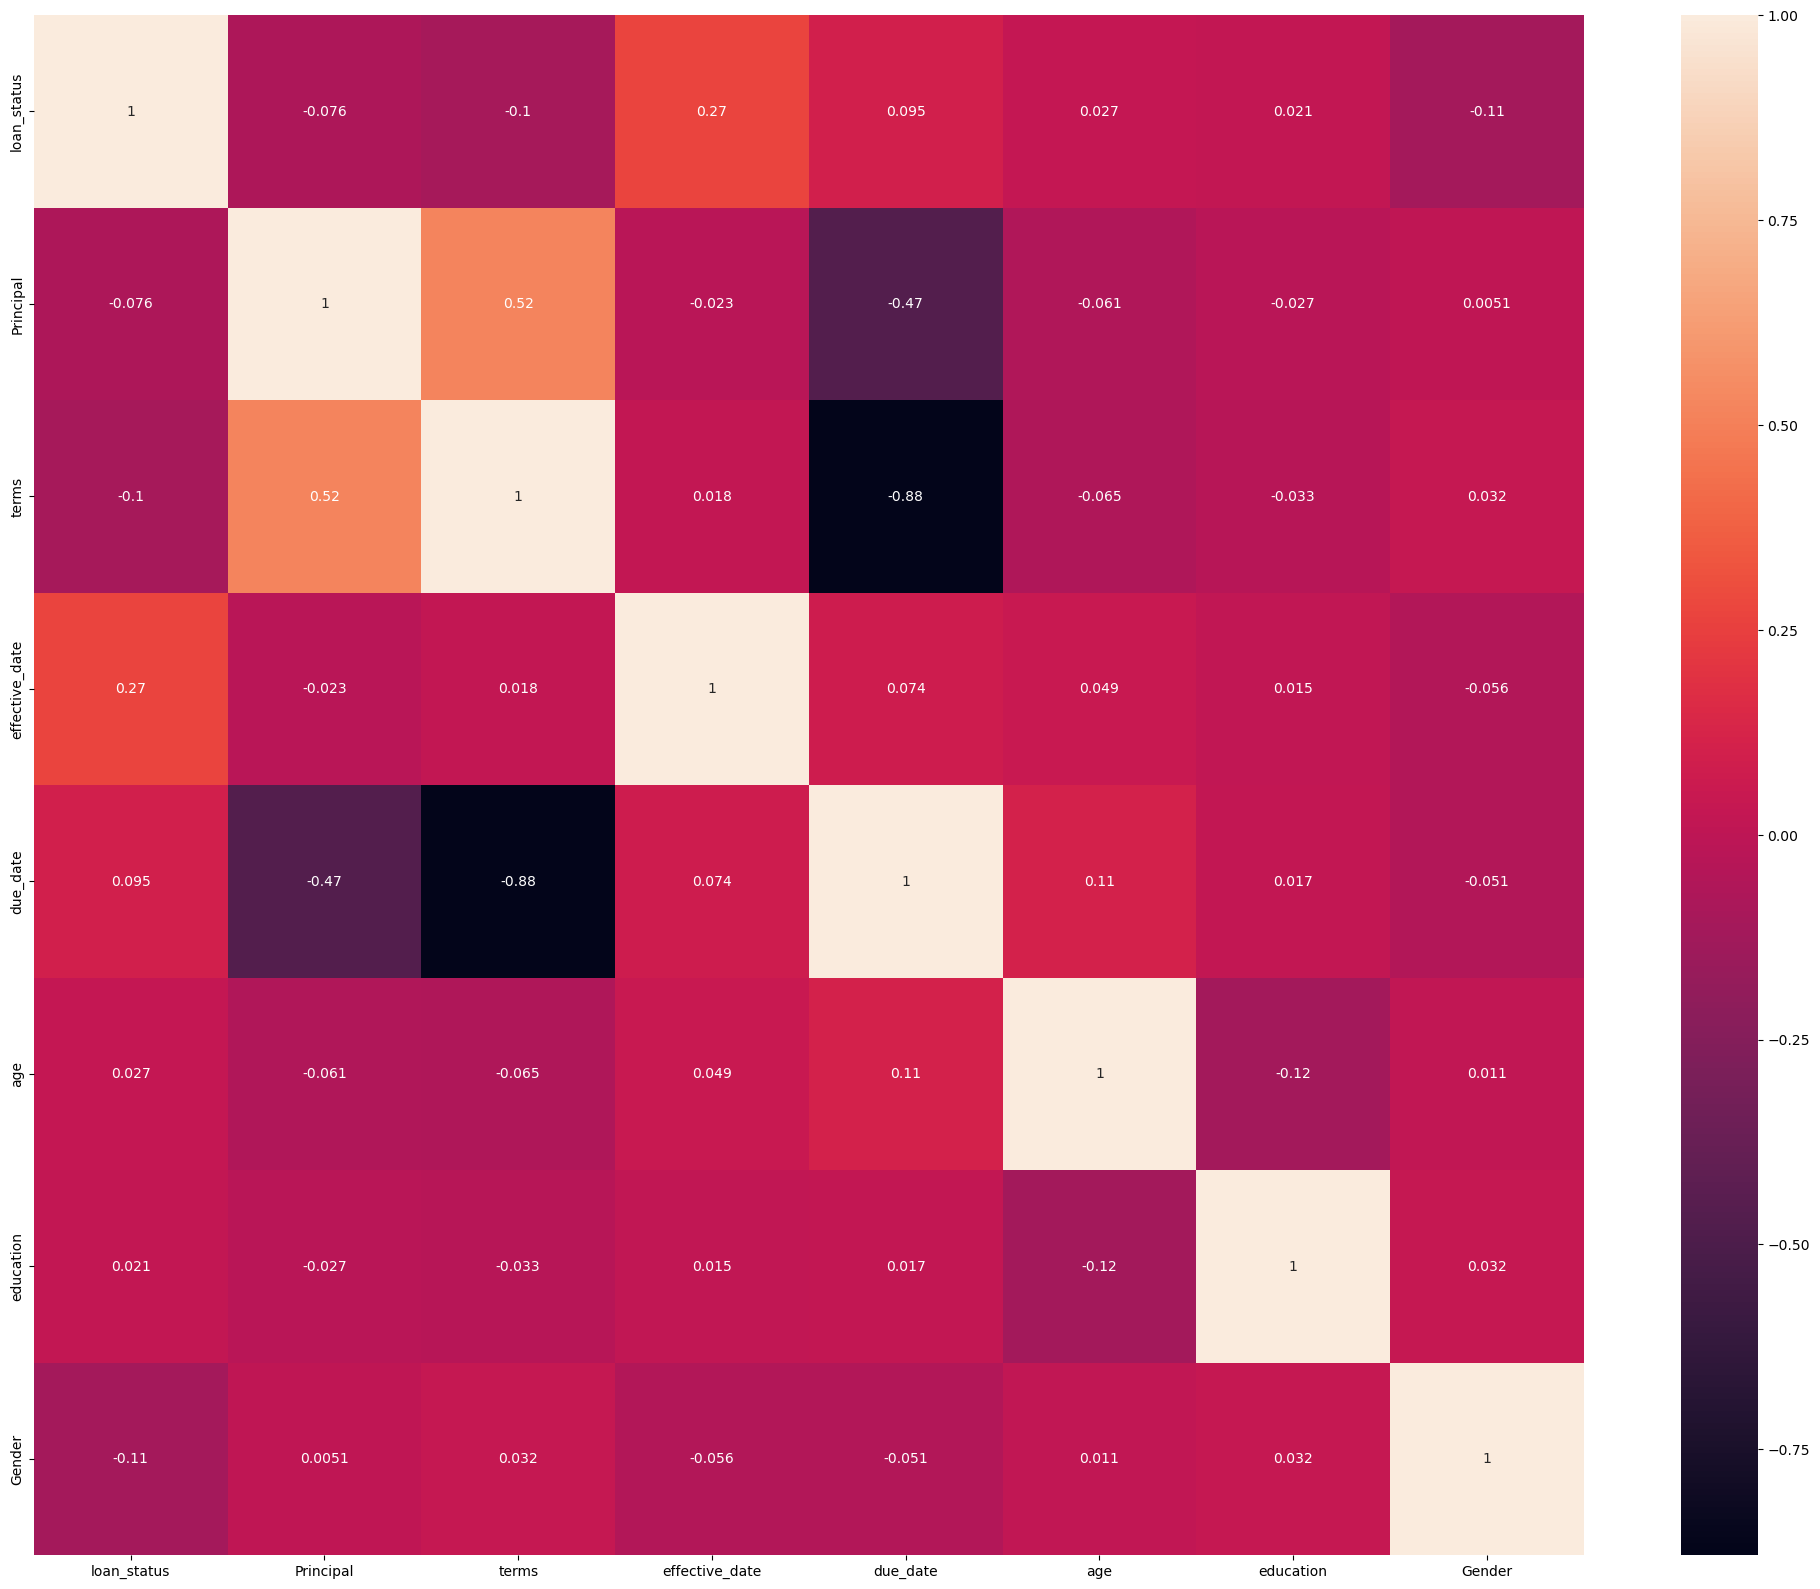

In [3854]:
plt.figure(figsize=(25,20))
sns.heatmap(data3.corr(),annot=True)

In [3855]:
header = data3.columns.values
header = np.delete(header, 0)
header = np.delete(header,header.size-1)

for i in range(len(header)):
    Q1 = data3[header[i]].quantile(0.25)
    Q3 = data3[header[i]].quantile(0.75)
    IQR = Q3 - Q1
    minthresh = Q1 - (1.5 * IQR)
    maxthresh = Q3 + (1.5 * IQR)
    outliers = data3[(data3[header[i]] < minthresh) | (data3[header[i]] > maxthresh)]
    data3 = data3.drop(outliers.index)

In [3856]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 7 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_status     292 non-null    int32  
 1   Principal       292 non-null    float64
 2   terms           292 non-null    float64
 3   effective_date  292 non-null    float64
 4   due_date        292 non-null    float64
 5   age             292 non-null    float64
 6   education       292 non-null    float64
 7   Gender          292 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 19.4 KB


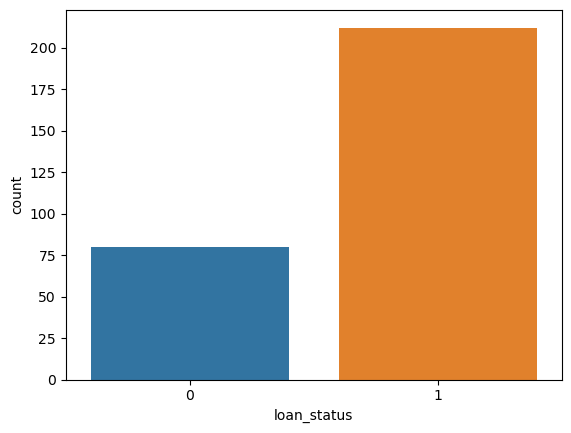

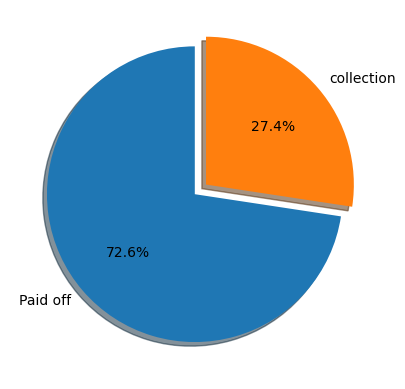

In [3857]:
ax=sns.countplot(x=data3['loan_status'], data=data3);
plt.show()
plt.pie(data3['loan_status'].value_counts(),labels = ['Paid off', 'collection'],autopct='%.1f%%',explode=(0,0.1),startangle=90,shadow=True)
plt.show()

In [3858]:
labels3 = data3["loan_status"]
data3 = data3.drop(["loan_status"], axis=1) 
X_train3,X_test3,y_train3,y_test3 = train_test_split(data3,labels3,test_size=0.3)
X_train3.shape,X_test3.shape

((204, 7), (88, 7))

In [3859]:
YTrainCount = y_train3.value_counts();
print("train data:\n",YTrainCount)
YTestCount = y_test3.value_counts();
print("test data:\n",YTestCount)

train data:
 1    144
0     60
Name: loan_status, dtype: int64
test data:
 1    68
0    20
Name: loan_status, dtype: int64


<font color ="red" size =30> Naive bayes </font>

The accuracy =  63.64 %


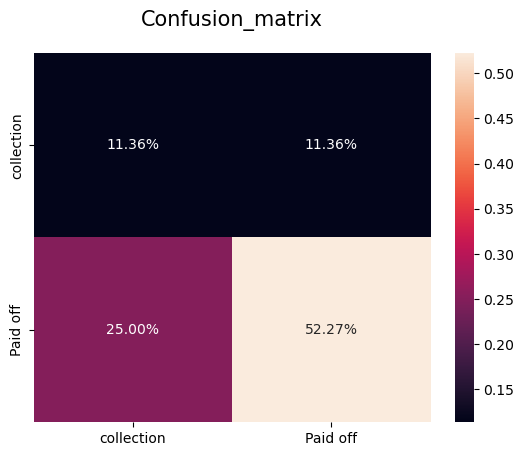

In [3860]:
NB = GaussianNB()
NB.fit(X_train3, y_train3)
y_pred3 = NB.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color ="red" size =30> KNN </font>

The accuracy =  77.27 %


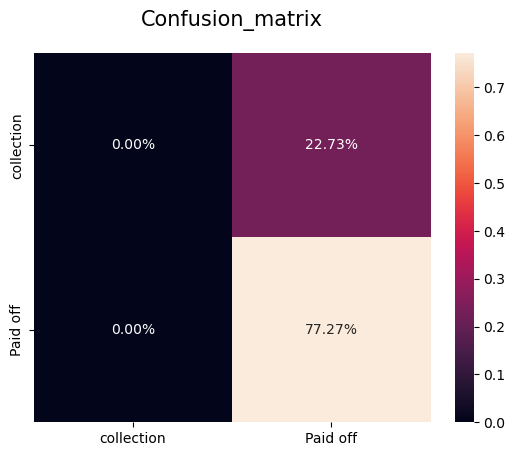

In [3861]:
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(X_train3, y_train3)
y_pred3= knn.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Increasing number of neighbors

The accuracy =  77.27 %


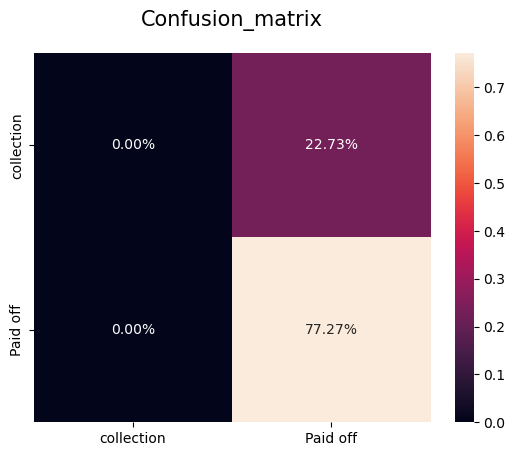

In [3862]:
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(X_train3, y_train3)
y_pred3= knn.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Dcrease number of neighbors

The accuracy =  73.86 %


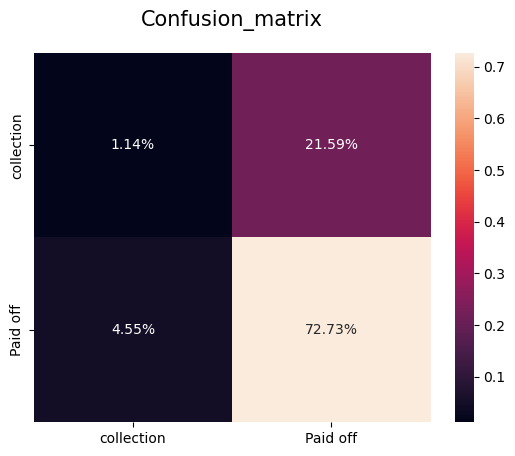

In [3863]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train3, y_train3)
y_pred3= knn.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>MLP</font>

Iteration 1, loss = 0.78028634
Iteration 2, loss = 0.74758933
Iteration 3, loss = 0.72168978
Iteration 4, loss = 0.69893392
Iteration 5, loss = 0.67996416
Iteration 6, loss = 0.66510421
Iteration 7, loss = 0.65398505
Iteration 8, loss = 0.64509661
Iteration 9, loss = 0.63559233
Iteration 10, loss = 0.62701442
Iteration 11, loss = 0.61989946
Iteration 12, loss = 0.61345018
Iteration 13, loss = 0.60868484
Iteration 14, loss = 0.60458783
Iteration 15, loss = 0.60191375
Iteration 16, loss = 0.59948734
Iteration 17, loss = 0.59759902
Iteration 18, loss = 0.59630046
Iteration 19, loss = 0.59621102
Iteration 20, loss = 0.59734603
Iteration 21, loss = 0.59647327
Iteration 22, loss = 0.59438362
Iteration 23, loss = 0.59261967
Iteration 24, loss = 0.59117903
Iteration 25, loss = 0.58906200
Iteration 26, loss = 0.58668979
Iteration 27, loss = 0.58465998
Iteration 28, loss = 0.58306520
Iteration 29, loss = 0.58162994
Iteration 30, loss = 0.58026370
Iteration 31, loss = 0.57922309
Iteration 32, los

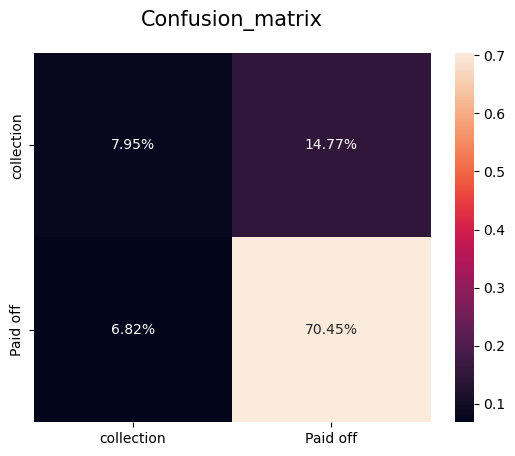

In [3864]:
MLP = MLPClassifier(verbose=True ,hidden_layer_sizes=(100,50))
MLP.fit(X_train3, y_train3)
y_pred3 = MLP.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Change number of iterations

Iteration 1, loss = 0.68198356
Iteration 2, loss = 0.66679816
Iteration 3, loss = 0.65939649
Iteration 4, loss = 0.65097384
Iteration 5, loss = 0.64121294
Iteration 6, loss = 0.63132301
Iteration 7, loss = 0.62222373
Iteration 8, loss = 0.61445048
Iteration 9, loss = 0.60819828
Iteration 10, loss = 0.60301857
Iteration 11, loss = 0.59859765
Iteration 12, loss = 0.59526370
Iteration 13, loss = 0.59270199
Iteration 14, loss = 0.59093616
Iteration 15, loss = 0.58986699
Iteration 16, loss = 0.58859217
Iteration 17, loss = 0.58696814
Iteration 18, loss = 0.58533165
Iteration 19, loss = 0.58356396
Iteration 20, loss = 0.58212828
Iteration 21, loss = 0.58101835
Iteration 22, loss = 0.58014213
Iteration 23, loss = 0.57957295
Iteration 24, loss = 0.57841214
Iteration 25, loss = 0.57728832
Iteration 26, loss = 0.57642880
Iteration 27, loss = 0.57579753
Iteration 28, loss = 0.57552512
Iteration 29, loss = 0.57553236
Iteration 30, loss = 0.57514440
Iteration 31, loss = 0.57479975
Iteration 32, los

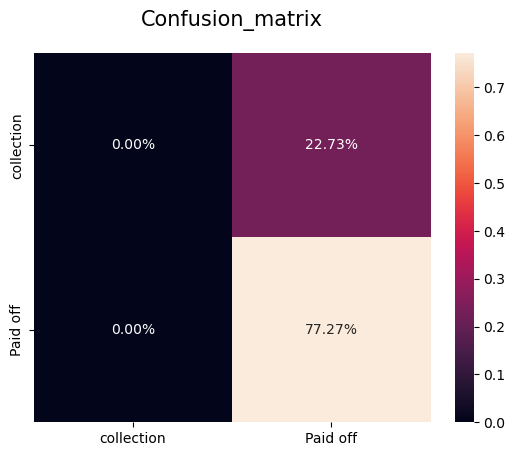

In [3865]:
MLP = MLPClassifier(random_state=10,verbose=True,max_iter=100,hidden_layer_sizes=(100,50))
MLP.fit(X_train3, y_train3)
y_pred3 = MLP.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Changing MLP  activation function and intial learning rate value and loss function calculation  and number of iterations parameters

Iteration 1, loss = 0.72066507
Iteration 2, loss = 0.72081119
Iteration 3, loss = 0.71748542
Iteration 4, loss = 0.71367614
Iteration 5, loss = 0.71042700
Iteration 6, loss = 0.70555073
Iteration 7, loss = 0.70010445
Iteration 8, loss = 0.69719043
Iteration 9, loss = 0.69353490
Iteration 10, loss = 0.68864509
Iteration 11, loss = 0.68495757
Iteration 12, loss = 0.68099427
Iteration 13, loss = 0.67808782
Iteration 14, loss = 0.67501616
Iteration 15, loss = 0.67262122
Iteration 16, loss = 0.67156919
Iteration 17, loss = 0.67064938
Iteration 18, loss = 0.66856987
Iteration 19, loss = 0.66683648
Iteration 20, loss = 0.66609060
Iteration 21, loss = 0.66431384
Iteration 22, loss = 0.66127357
Iteration 23, loss = 0.65872437
Iteration 24, loss = 0.65835865
Iteration 25, loss = 0.65574994
Iteration 26, loss = 0.65265471
Iteration 27, loss = 0.64991539
Iteration 28, loss = 0.64719397
Iteration 29, loss = 0.64537887
Iteration 30, loss = 0.64363637
Iteration 31, loss = 0.64138221
Iteration 32, los

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


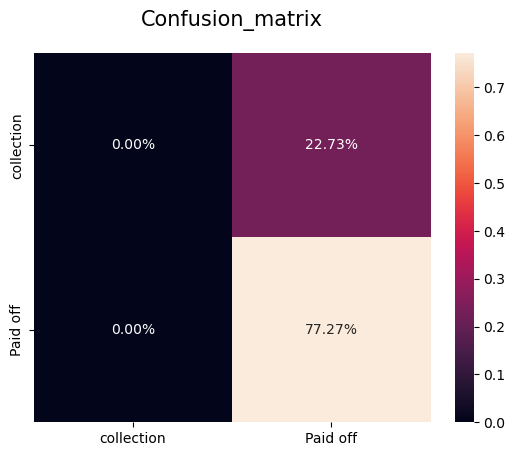

In [3866]:
MLP = MLPClassifier(activation="tanh",solver="sgd",learning_rate="adaptive" ,
                    momentum=0.5,learning_rate_init=0.001,random_state=10,
                    verbose=True,max_iter=300,hidden_layer_sizes=(100,50))
MLP.fit(X_train3, y_train3)
y_pred3 = MLP.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

<font color = "red" size = 30>SVM</font>

The accuracy =  77.27 %


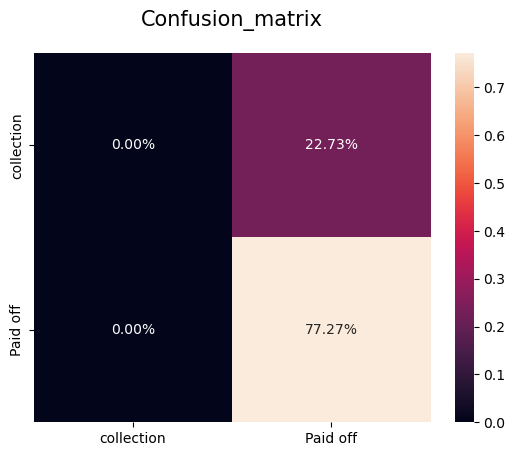

In [3867]:
SVM = SVC()
SVM.fit(X_train3, y_train3)
y_pred3 = SVM.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Changing SVM parameters 

The accuracy =  77.27 %


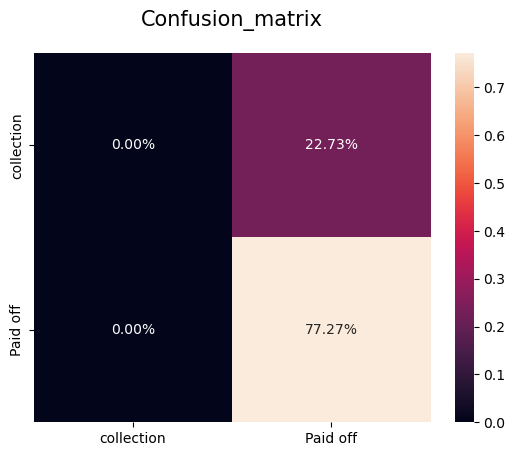

In [3868]:
SVM = SVC(C=0.1 , gamma=0.1 , kernel='sigmoid')
SVM.fit(X_train3, y_train3)
y_pred3 = SVM.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

The accuracy =  76.14 %


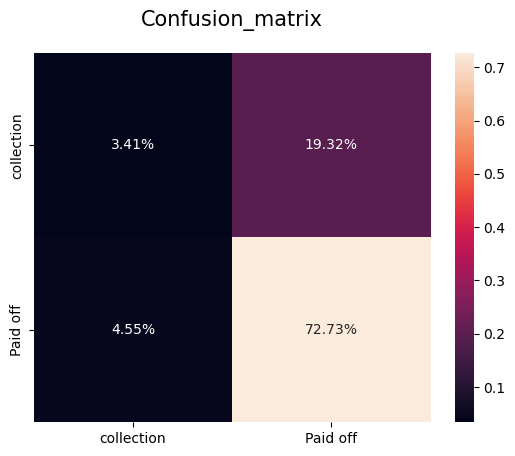

In [3869]:
SVM = SVC(C=100 , gamma=0.01 , kernel='rbf')
SVM.fit(X_train3, y_train3)
y_pred3 = SVM.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show() 

<font color = "red" size = 30>Decision tree</font>

The accuracy =  68.18 %


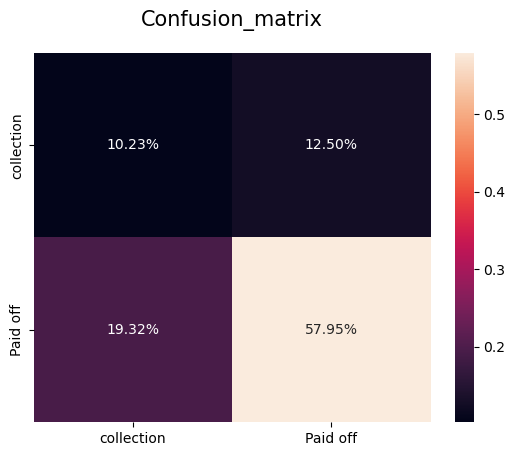

In [3870]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train3, y_train3)
y_pred3 = Tree.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

First tree visualized

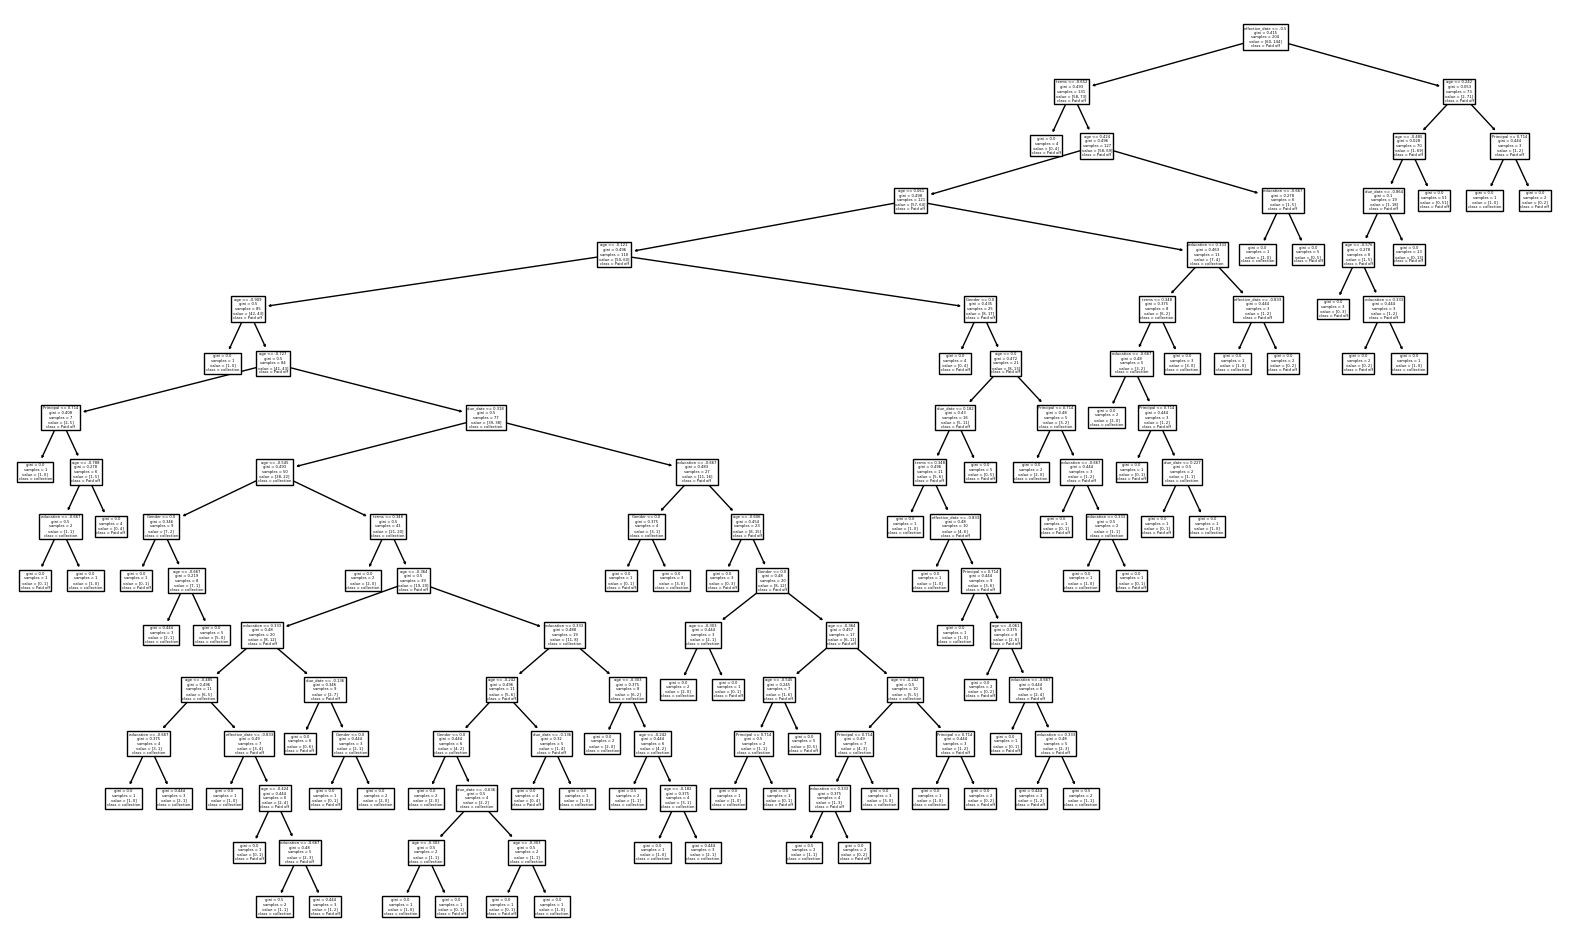

In [3871]:
fig = plt.figure(figsize=(20, 12))
tree.plot_tree(Tree,class_names=['collection','Paid off'],feature_names=list(X_train3.columns))
plt.show()

Change parameter of decision Tree to use entropy

The accuracy =  64.77 %


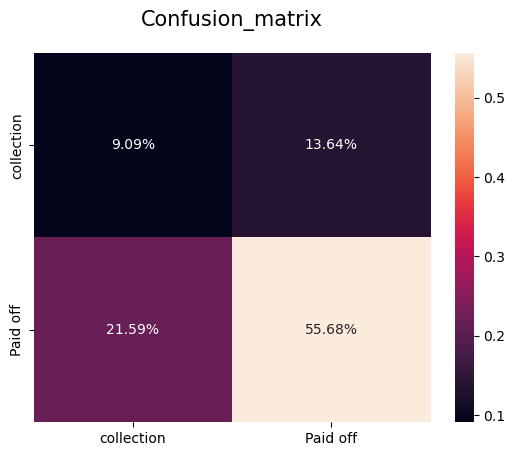

In [3872]:
Tree = DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train3, y_train3)
y_pred3 = Tree.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Second tree visualized

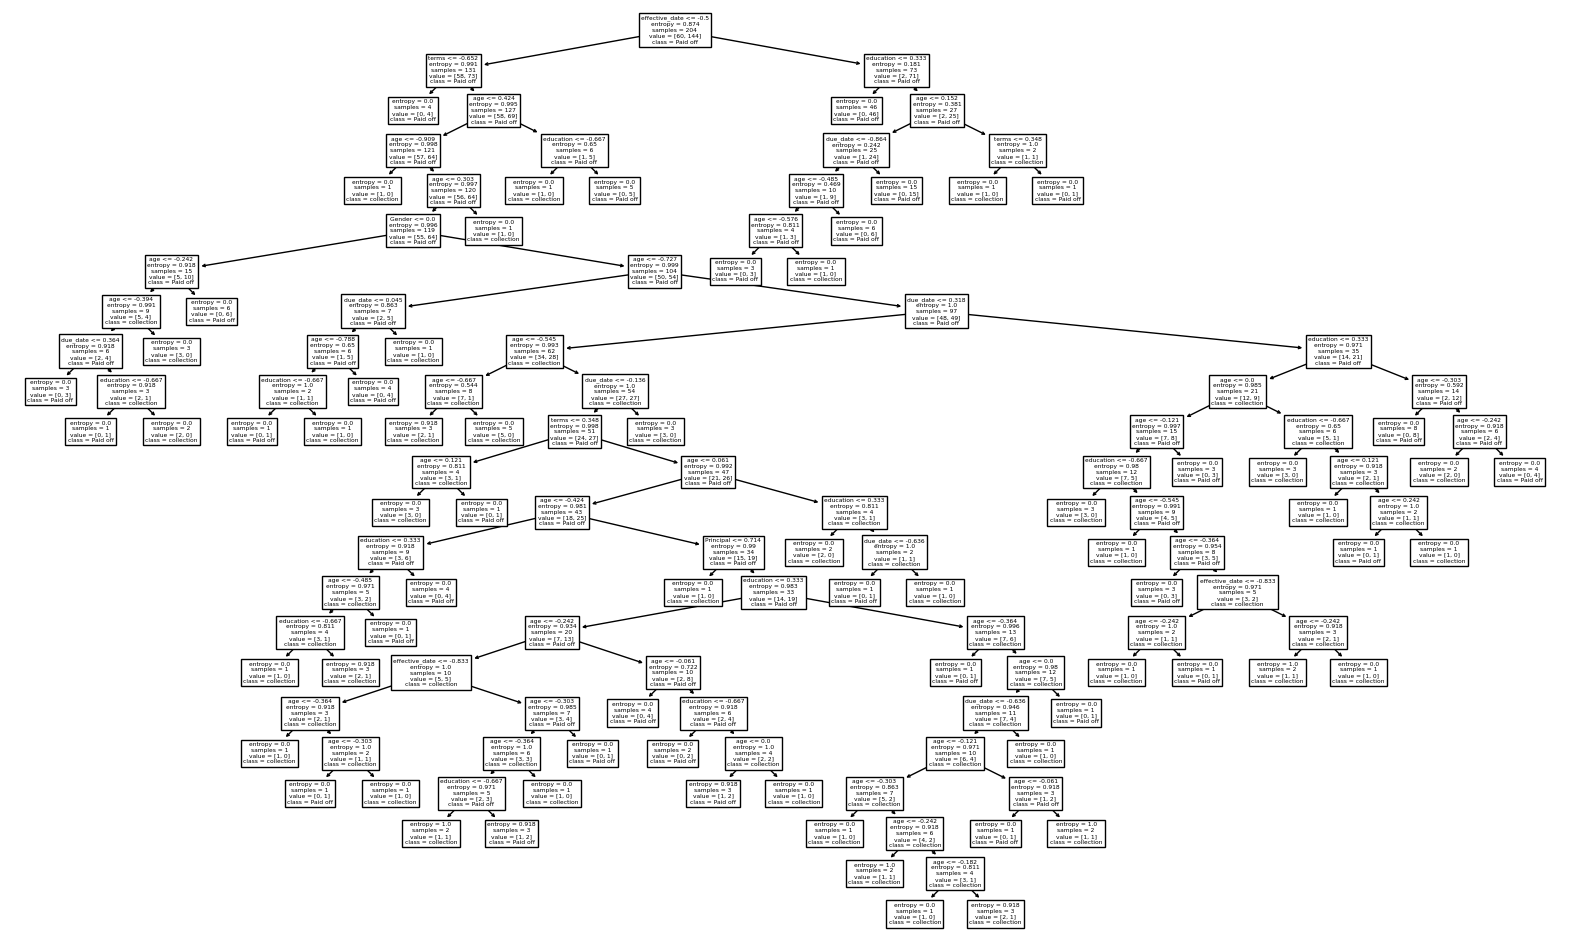

In [3873]:
fig = plt.figure(figsize=(20, 12))
tree.plot_tree(Tree,class_names=['collection','Paid off'],feature_names=list(X_train3.columns))
plt.show()

Changing parameters of Decision Tree to use entropy and changing maximum depth

The accuracy =  73.86 %


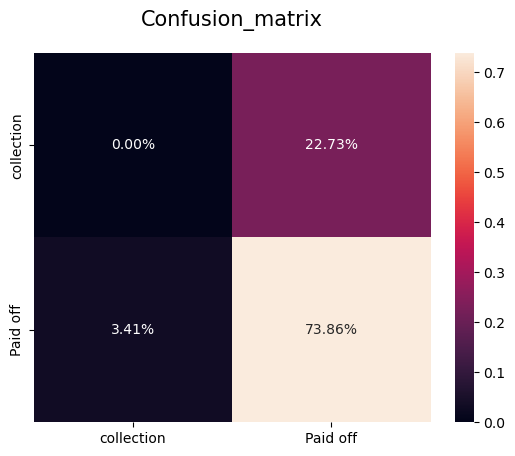

In [3874]:
Tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
Tree.fit(X_train3, y_train3)
y_pred3 = Tree.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_pred3)
print("The accuracy = ",round(accuracy3*100,2) , "%")
categories = ['collection','Paid off']
matrix = confusion_matrix(y_test3, y_pred3)
ax = sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%')
ax.yaxis.set_ticklabels(categories)
ax.xaxis.set_ticklabels(categories)
plt.title('Confusion_matrix', y=1.05, size=15)
plt.show()

Third tree visualized

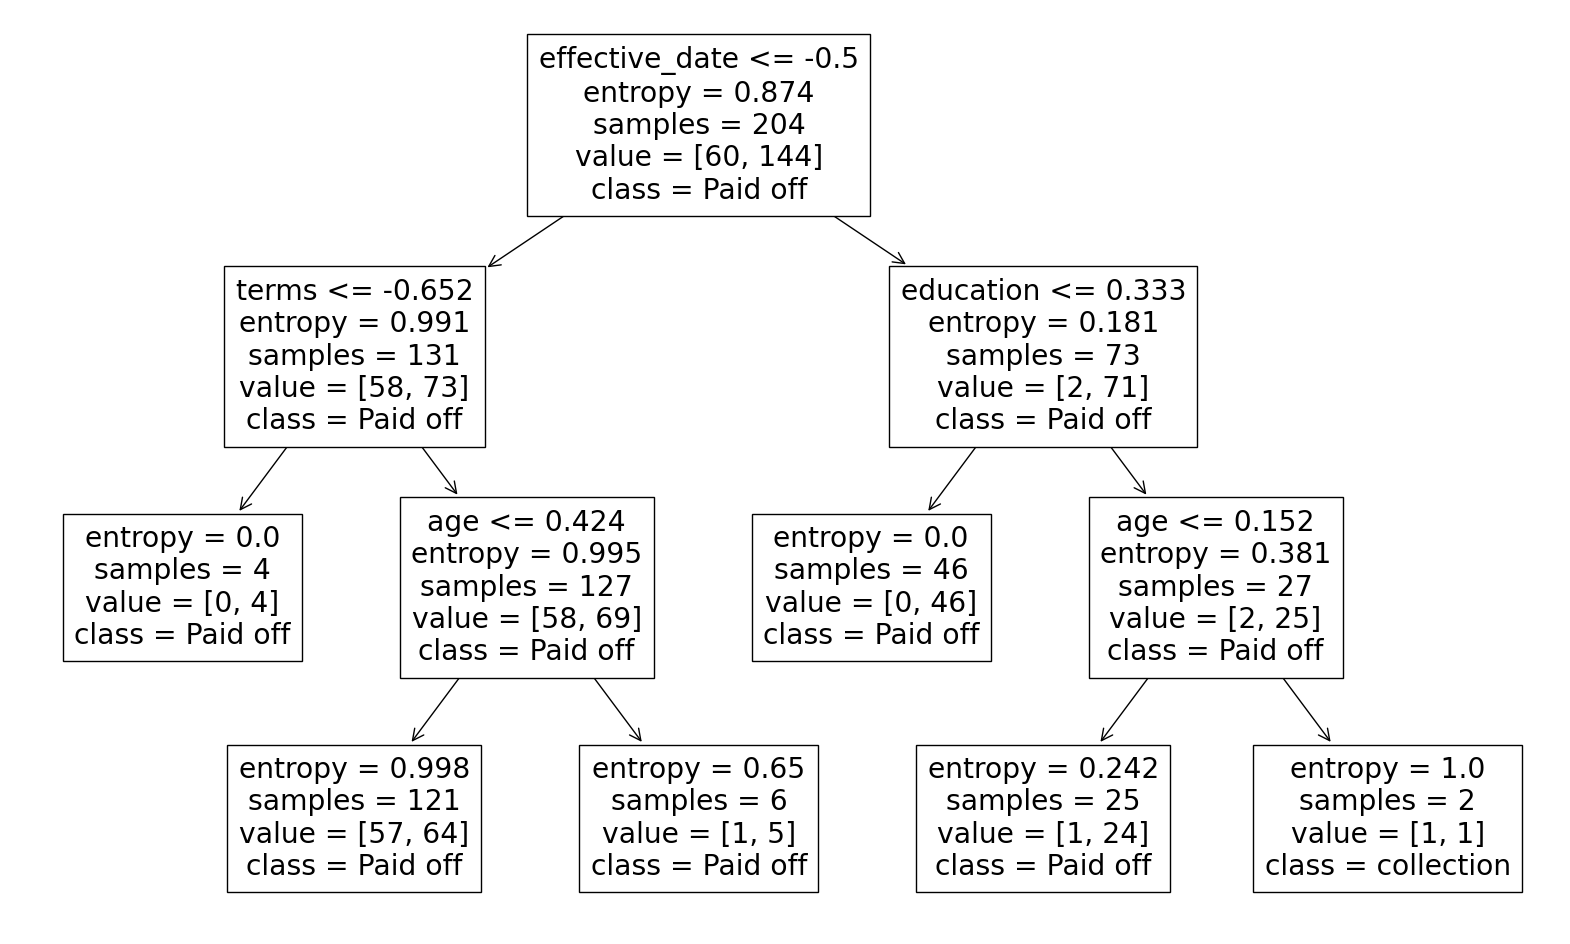

In [3875]:
fig = plt.figure(figsize=(20, 12))
tree.plot_tree(Tree,class_names=['collection','Paid off'],feature_names=list(X_train3.columns))
plt.show()